# 클러스터링

In [73]:
import pandas as pd
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./no_NaN_dataset.csv', encoding='cp949')

df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명)
0,서울특별시,종로구,2010,170578,17,14,1107,852,1011,396,29164,141414
1,서울특별시,중구,2010,132822,13,12,1170,671,1049,378,19628,113194
2,서울특별시,용산구,2010,244853,19,15,2312,1086,1784,528,37318,207535
3,서울특별시,성동구,2010,309093,31,20,2886,1226,2306,672,51562,257531
4,서울특별시,광진구,2010,375463,42,22,3366,1290,2672,811,67422,308041
...,...,...,...,...,...,...,...,...,...,...,...,...
2971,경상남도,함양군,2022,37708,12,13,76,668,90,60,4135,33573
2972,경상남도,거창군,2022,60387,16,17,175,804,163,94,8548,51839
2973,경상남도,합천군,2022,42142,15,17,97,899,89,71,3385,38757
2974,제주특별자치도,제주시,2022,493389,74,69,2766,3281,2034,1102,84346,409043


In [3]:
col = ['총인구수(명)','유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)', '총인구수-학령인구(명)']

new_df = df.copy()

In [4]:
new_df = new_df.drop(['연도'],axis=1, inplace=False)

new_df

,행정구역(시도),행정구역(시군구),총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명)
0,서울특별시,종로구,170578,17,14,1107,852,1011,396,29164,141414
1,서울특별시,중구,132822,13,12,1170,671,1049,378,19628,113194
2,서울특별시,용산구,244853,19,15,2312,1086,1784,528,37318,207535
3,서울특별시,성동구,309093,31,20,2886,1226,2306,672,51562,257531
4,서울특별시,광진구,375463,42,22,3366,1290,2672,811,67422,308041
...,...,...,...,...,...,...,...,...,...,...,...
2971,경상남도,함양군,37708,12,13,76,668,90,60,4135,33573
2972,경상남도,거창군,60387,16,17,175,804,163,94,8548,51839
2973,경상남도,합천군,42142,15,17,97,899,89,71,3385,38757
2974,제주특별자치도,제주시,493389,74,69,2766,3281,2034,1102,84346,409043


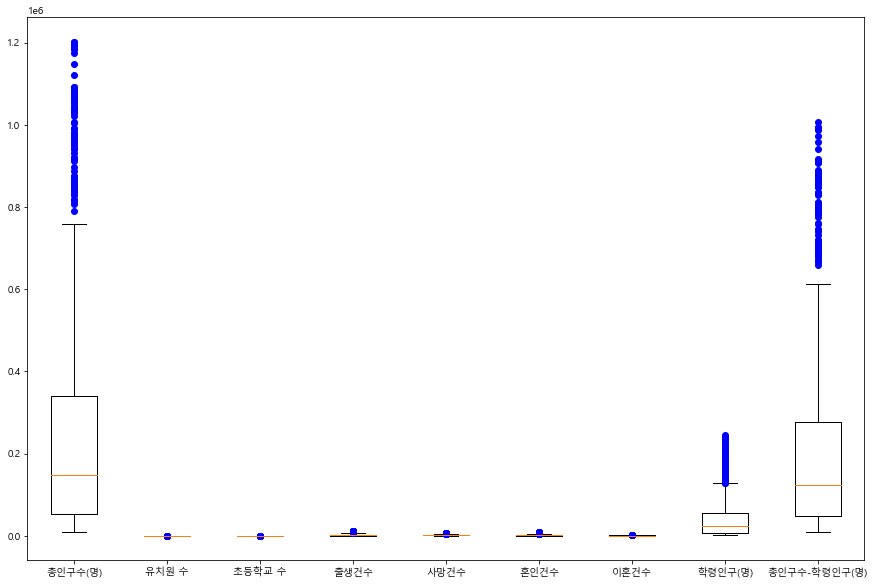

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(15, 10))
plt.boxplot([new_df[col[i]] for i in range(len(col))], sym='bo')
plt.xticks(range(1, len(col) + 1), col)

plt.show()

In [6]:
for col_name in col:
    mask_positive = new_df[col_name] >= 0
    mask_negative = ~mask_positive

    # 양수에 대해서는 로그 변환
    new_df.loc[mask_positive, col_name] = np.log1p(new_df.loc[mask_positive, col_name])

    # 음수에 대해서는 음수로 변환 후 로그 변환
    new_df.loc[mask_negative, col_name] = -np.log1p(-new_df.loc[mask_negative, col_name])

print(new_df.isnull().sum())

행정구역(시도)        0
행정구역(시군구)       0
총인구수(명)         0
유치원 수           0
초등학교 수          0
출생건수            0
사망건수            0
혼인건수            0
이혼건수            0
학령인구(명)         0
총인구수-학령인구(명)    0
dtype: int64


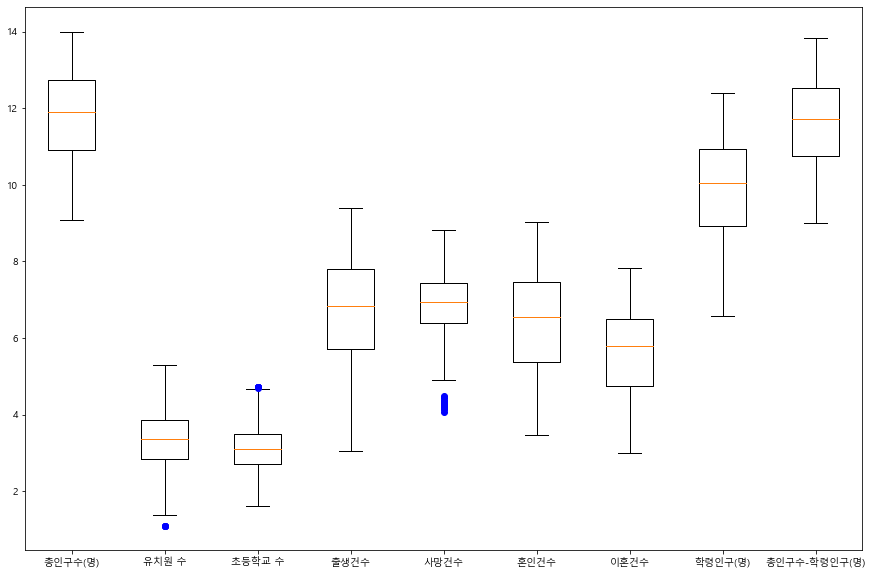

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.boxplot([new_df[col[i]] for i in range(len(col))], sym='bo')
plt.xticks(range(1, len(col) + 1), col)

plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [9]:
X_features = new_df[col].values

In [10]:
# 정규 분포로 다시 스케일링하기
from sklearn.preprocessing import StandardScaler

X_features_scaled = StandardScaler().fit_transform(X_features)

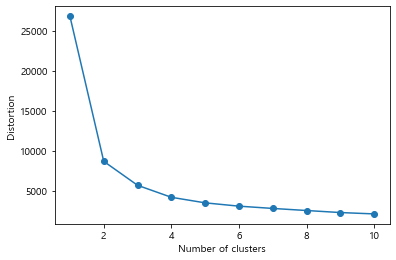

In [11]:
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)   # 모델 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10) # 모델 생성

# 모델 학습과 결과 예측(클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

In [13]:
new_df['ClusterLabel'] = Y_labels

new_df.head()

,행정구역(시도),행정구역(시군구),총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),ClusterLabel
0,서울특별시,종로구,12.046954,2.890372,2.708050,7.010312,6.748760,6.919684,5.983936,10.280725,11.859454,2
1,서울특별시,중구,11.796773,2.639057,2.564949,7.065613,6.510258,6.956545,5.937536,9.884763,11.636867,2
2,서울특별시,용산구,12.408417,2.995732,2.772589,7.746301,6.991177,7.487174,6.270988,10.527258,12.243060,3
3,서울특별시,성동구,12.641401,3.465736,3.044522,7.967973,7.112327,7.743703,6.511745,10.850560,12.458899,3
4,서울특별시,광진구,12.835918,3.761200,3.135494,8.121777,7.163172,7.890957,6.699500,11.118741,12.637991,3


In [14]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0,n_init=10)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [15]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init=10)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

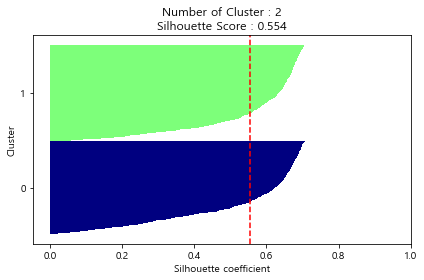

In [16]:
silhouetteViz(2, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

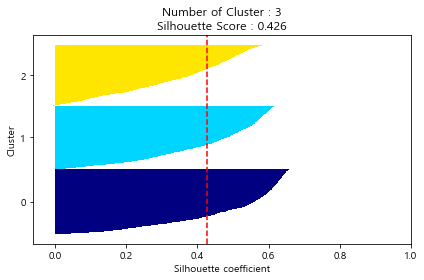

In [17]:
silhouetteViz(3, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

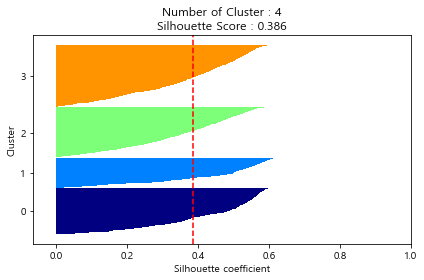

In [18]:
silhouetteViz(4, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

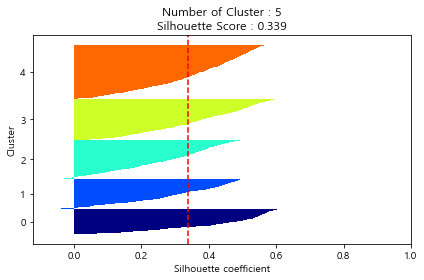

In [19]:
silhouetteViz(5, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

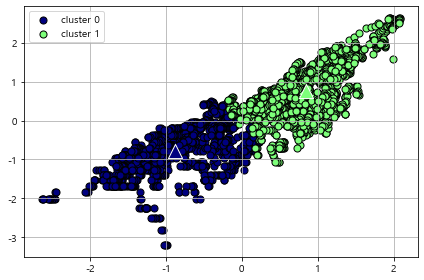

In [20]:
clusterScatter(2, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

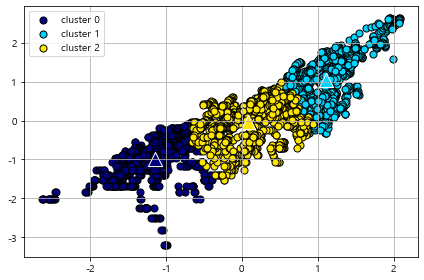

In [21]:
clusterScatter(3, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

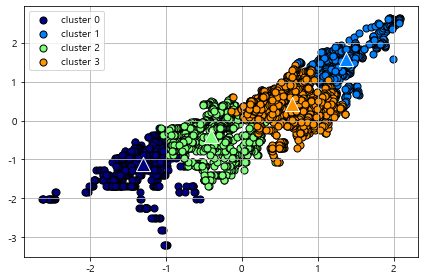

In [22]:
clusterScatter(4, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

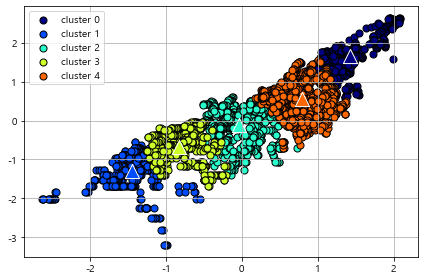

In [23]:
clusterScatter(5, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

In [179]:
best_cluster = 2

kmeans = KMeans(n_clusters=best_cluster, random_state=0,n_init=10)
Y_labels = kmeans.fit_predict(X_features_scaled)

In [180]:
#df['ClusterLabel'] = Y_labels
new_df['ClusterLabel'] = Y_labels

df.head()  #작업 확인용 출력

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명)
0,서울특별시,종로구,2010,170578,17,14,1107,852,1011,396,29164,141414
1,서울특별시,중구,2010,132822,13,12,1170,671,1049,378,19628,113194
2,서울특별시,용산구,2010,244853,19,15,2312,1086,1784,528,37318,207535
3,서울특별시,성동구,2010,309093,31,20,2886,1226,2306,672,51562,257531
4,서울특별시,광진구,2010,375463,42,22,3366,1290,2672,811,67422,308041


In [181]:
print(new_df.groupby('ClusterLabel')['행정구역(시군구)'].count())

ClusterLabel
0    1458
1    1518
Name: 행정구역(시군구), dtype: int64


In [182]:
new_df.drop(['행정구역(시도)','행정구역(시군구)'],axis=1, inplace=False).groupby('ClusterLabel').mean()

,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명)
ClusterLabel,,,,,,,,,
0,10.911349,2.839525,2.720214,5.672437,6.333069,5.379881,4.750097,8.897452,10.764368
1,12.715759,3.935450,3.525646,7.788492,7.436748,7.451021,6.537551,10.952759,12.524177


In [183]:
new_df1 = new_df[['행정구역(시도)', '행정구역(시군구)', 'ClusterLabel']]
new_df1 = new_df.groupby(['행정구역(시도)', '행정구역(시군구)'])['ClusterLabel'].apply(lambda x: x.mode().iloc[0]).reset_index()
new_df1

merged_df = pd.merge(df, new_df1[['행정구역(시도)', '행정구역(시군구)', 'ClusterLabel']], 
                     on=['행정구역(시도)', '행정구역(시군구)'], how='left')

merged_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),ClusterLabel
0,서울특별시,종로구,2010,170578,17,14,1107,852,1011,396,29164,141414,0
1,서울특별시,중구,2010,132822,13,12,1170,671,1049,378,19628,113194,0
2,서울특별시,용산구,2010,244853,19,15,2312,1086,1784,528,37318,207535,1
3,서울특별시,성동구,2010,309093,31,20,2886,1226,2306,672,51562,257531,1
4,서울특별시,광진구,2010,375463,42,22,3366,1290,2672,811,67422,308041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,경상남도,함양군,2022,37708,12,13,76,668,90,60,4135,33573,0
2972,경상남도,거창군,2022,60387,16,17,175,804,163,94,8548,51839,0
2973,경상남도,합천군,2022,42142,15,17,97,899,89,71,3385,38757,0
2974,제주특별자치도,제주시,2022,493389,74,69,2766,3281,2034,1102,84346,409043,1


In [184]:
top_df = merged_df.loc[merged_df['ClusterLabel'] == 2, ['행정구역(시도)','행정구역(시군구)']]
#top_df[top_df['행정구역(시도)'] == '강원특별자치도']
top_df_no_duplicates = top_df.drop_duplicates()
top_df_no_duplicates[top_df_no_duplicates['행정구역(시도)'] == '강원특별자치도']
#print(top_df_no_duplicates[top_df_no_duplicates['행정구역(시도)'] == '경기도'])
#print(top_df_no_duplicates[top_df_no_duplicates['행정구역(시도)'] == '경상북도'])
#print(top_df_no_duplicates[top_df_no_duplicates['행정구역(시도)'] == '경상남도'])
#print(top_df_no_duplicates[top_df_no_duplicates['행정구역(시도)'] == '서울특별시'])

,행정구역(시도),행정구역(시군구)


In [185]:
cluster_df0 = merged_df[merged_df['ClusterLabel']==0]
cluster_df1 = merged_df[merged_df['ClusterLabel']==1]
#cluster_df2 = merged_df[merged_df['ClusterLabel']==2]
#cluster_df3 = merged_df[merged_df['ClusterLabel']==3]

#print(cluster_df0.head())
#print(cluster_df1.head())
#print(cluster_df2.head())

# 모델 생성

In [186]:
#Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor

In [187]:
features = cluster_df0[['총인구수(명)', '유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수', 
                        '이혼건수','학령인구(명)']]
target = cluster_df0['총인구수-학령인구(명)']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [188]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [189]:
y_pred = model.predict(X_test)

In [190]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    평균절대백분율오차를 계산하는 함수
    
    :param y_true: 실제 값이 들어 있는 리스트 또는 배열
    :param y_pred: 예측 값이 들어 있는 리스트 또는 배열
    :return: MAPE 값
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_elements = y_true != 0
    
    if np.any(non_zero_elements):
        mape = np.mean(np.abs((y_true[non_zero_elements] - y_pred[non_zero_elements]) / y_true[non_zero_elements])) * 100
        return mape
    else:
        return np.inf

In [191]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MAPE: 1.13029193613589


In [192]:
def prediction(df):
    features = df[['총인구수(명)', '유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수', 
                        '이혼건수','학령인구(명)']]
    target = df['총인구수-학령인구(명)']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
    
    model = RandomForestRegressor(n_estimators=50,random_state=42)
    #model = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE:", mape)
    #eature_importances = model.feature_importances_
    #rint("Feature Importances:", feature_importances)
    return y_test,y_pred

In [193]:
test, pred = prediction(cluster_df0)

MAPE: 0.9552660058415531


In [194]:
test, pred=prediction(cluster_df1)

MAPE: 0.9284431451186583


In [195]:
#test, pred=prediction(cluster_df2)

In [196]:
#test, pred=prediction(cluster_df3)

MAPE: 0.9552660058415531


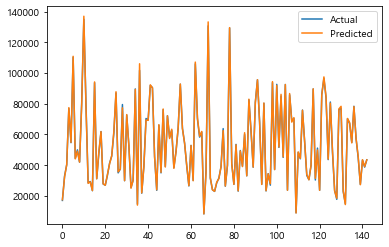

In [198]:
test, pred = prediction(cluster_df0)

a=[]
b=[]

for i,j in zip(test,pred):
    a.append(i)
    b.append(j)
    
plt.plot(a, label='Actual')
plt.plot(b, label ='Predicted')
plt.legend()
plt.show()

# Prediction

In [199]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import tensorflow as tf

tf.data.experimental.enable_debug_mode()

In [200]:
def merge_region(df):
    sorted_cluster_df = df.sort_values(by=['행정구역(시도)', '행정구역(시군구)'])

    sorted_cluster_df['행정구역'] = sorted_cluster_df['행정구역(시도)'] + ' ' + sorted_cluster_df['행정구역(시군구)']

    sorted_cluster_df.drop(['행정구역(시도)', '행정구역(시군구)'], axis=1, inplace=True)
    
    return sorted_cluster_df

In [201]:
def split_by_region(df):
    regions = df['행정구역'].unique()
    cluster = []
    for i in range(len(regions)):
        cluster.append(df[df['행정구역'] == regions[i]])
        cluster[i] = cluster[i][['행정구역','연도','총인구수(명)','총인구수-학령인구(명)','유치원 수','초등학교 수', '출생건수', 
                              '사망건수','혼인건수','이혼건수','학령인구(명)']]
    return cluster

In [202]:
def train_and_predict(data):
    # 정규화
    scaler = StandardScaler()
    features = data[['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)','총인구수-학령인구(명)']].values
    features_scaled = scaler.fit_transform(features)

    # 시퀀스 생성
    if data.shape[0]-1 >3:
        seq_length = 3 #data.shape[0]-1
    else:
        seq_length = data.shape[0]-1
    X = []
    y = []
    for i in range(len(features_scaled) - seq_length):
        X.append(features_scaled[i:i+seq_length])
        y.append(features_scaled[i+seq_length])

    X, y = np.array(X), np.array(y)

    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, features.shape[1])))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(features.shape[1], activation='linear'))  # 회귀 레이어 수정
    model.compile(optimizer='adam', loss='mse')

    # 모델 학습
    model.fit(X, y, epochs=100, batch_size=16, verbose=0)

    # 마지막 데이터를 사용하여 다음 연도 예측
    new_data = features_scaled[-seq_length:]
    new_data = new_data.reshape((1, seq_length, features.shape[1]))

    predicted_data_scaled = model.predict(new_data)

    # 역정규화하여 예측 결과 얻기
    predicted_data = scaler.inverse_transform(predicted_data_scaled)

    return predicted_data

In [203]:
def predict_feature(df):
    predict_list = []
    for i in range(len(df)):
        predict_data = train_and_predict(df[i])
        predict_list.append(predict_data)
        print(df[i]["행정구역"].iloc[0], predict_data)
    
    return predict_list

In [204]:
def future_prediction(df):
    features = df[['총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)']]
    target = df['총인구수-학령인구(명)']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
    
    model = RandomForestRegressor(n_estimators=50,random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    #print(y_pred)

    return model

In [205]:
def run_model(predict_list, model):
    random_for = []
    lstmm = []
    column = ['총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)']

    for i in range(len(predict_list)):
        rf = [round(float(value)) for value in str(predict_list[i][0][0:-1])[1:-2].split()]
        total_rf = pd.DataFrame([rf], columns=column)
        predicti = model.predict(total_rf)
        random_for.append(round(float(predicti[0])))
        
        lt = round(float(str(predict_list[i][0][-1])))
        lstmm.append(round(lt))
        
    return random_for, lstmm

In [206]:
def actual_data(df, cluster_df):
    df = df[df['연도'] == 2021]

    df = df[['행정구역(시도)','행정구역(시군구)','총인구수-학령인구(명)']]
    df['행정구역'] = df['행정구역(시도)'] + ' ' + df['행정구역(시군구)']
    df.drop(['행정구역(시도)', '행정구역(시군구)'], axis=1, inplace=True)

    df = df[df['행정구역'].isin(cluster_df['행정구역'].unique())]
    df = df.sort_values(by=['행정구역'])
    actu = df['총인구수-학령인구(명)'].reset_index(drop=True)
    return actu

In [207]:
def visualization_prediction(actu, model):
    
    actu_no_nan = np.where(np.isnan(actu), model,actu)
    plt.plot(actu_no_nan, label='Actual')
    plt.plot(model, label='model')

    plt.xlabel('Region Index')
    plt.ylabel('Scholar Population')
    plt.legend()
    plt.show()

    mape = mean_absolute_percentage_error(actu_no_nan, model)
    print("MAPE:", mape)

In [208]:
sort_cluster0 = merge_region(cluster_df0)
sort_cluster1 = merge_region(cluster_df1)
#sort_cluster2 = merge_region(cluster_df2)
#======================================================================
cluster0 = split_by_region(sort_cluster0)
cluster1 = split_by_region(sort_cluster1)
#cluster2 = split_by_region(sort_cluster2)
#======================================================================
# 굉장히 오래걸림

#predict_list0 = predict_feature(cluster0)
#print('[INFO]FINISH CLUSTER 0')
#predict_list1 = predict_feature(cluster1)
#print('[INFO]FINISH CLUSTER 1')
#predict_list2 = predict_feature(cluster2)
#print('[INFO]FINISH CLUSTER 2')
#======================================================================

In [209]:
'''model0 = future_prediction(cluster_df0)#cluster_df0)
model1 = future_prediction(cluster_df1)#cluster_df1)
model2 = future_prediction(cluster_df2)

random_for0, lstmm0 = run_model(predict_list0,model0)
random_for1, lstmm1 = run_model(predict_list1,model1)
random_for2, lstmm2 = run_model(predict_list2,model2)
#======================================================================
temp_df = pd.read_csv('./knu-ds-dataset_v1.csv', encoding='cp949')
actu0 = actual_data(temp_df,sort_cluster0)
actu1 = actual_data(temp_df,sort_cluster1)
actu2 = actual_data(temp_df,sort_cluster2)
#======================================================================
print('Cluster 0\n')
print('RandomForestRegressor')
visualization_prediction(actu0, random_for0)
print('LSTM')
visualization_prediction(actu0, lstmm0)
result0 = [round((rf + lt) / 2) for rf, lt in zip(random_for0, lstmm0)]
print('RandomForest + LSTM')
visualization_prediction(actu0, result0)

print('\nCluster 1\n')
print('RandomForestRegressor')
visualization_prediction(actu1, random_for1)
print('LSTM')
visualization_prediction(actu1, lstmm1)
result1 = [round((rf + lt) / 2) for rf, lt in zip(random_for1, lstmm1)]
print('RandomForest + LSTM')
visualization_prediction(actu1, result1)


print('\nCluster 2\n')
print('RandomForestRegressor')
visualization_prediction(actu2, random_for2)
print('LSTM')
visualization_prediction(actu2, lstmm2)
result2 = [round((rf + lt) / 2) for rf, lt in zip(random_for2, lstmm2)]
print('RandomForest + LSTM')
visualization_prediction(actu2, result2)'''


"model0 = future_prediction(cluster_df0)#cluster_df0)\nmodel1 = future_prediction(cluster_df1)#cluster_df1)\nmodel2 = future_prediction(cluster_df2)\n\nrandom_for0, lstmm0 = run_model(predict_list0,model0)\nrandom_for1, lstmm1 = run_model(predict_list1,model1)\nrandom_for2, lstmm2 = run_model(predict_list2,model2)\n#======================================================================\ntemp_df = pd.read_csv('./knu-ds-dataset_v1.csv', encoding='cp949')\nactu0 = actual_data(temp_df,sort_cluster0)\nactu1 = actual_data(temp_df,sort_cluster1)\nactu2 = actual_data(temp_df,sort_cluster2)\n#======================================================================\nprint('Cluster 0\n')\nprint('RandomForestRegressor')\nvisualization_prediction(actu0, random_for0)\nprint('LSTM')\nvisualization_prediction(actu0, lstmm0)\nresult0 = [round((rf + lt) / 2) for rf, lt in zip(random_for0, lstmm0)]\nprint('RandomForest + LSTM')\nvisualization_prediction(actu0, result0)\n\nprint('\nCluster 1\n')\nprint('Ran

In [210]:
'''cluster0 = split_by_region(sort_cluster0)
for i in range(len(cluster0)):
    features = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)','총인구수-학령인구(명)']
    value = []
    value.append(str(cluster0[i]['행정구역'].unique()[0]))
    value.append(2023)
    #print(value)
    for j in range(len(predict_list0[i][0])-1):
        value.append(round(float(predict_list0[i][0][j])))
    x = pd.DataFrame([value], columns = features)
    cluster0[i] = pd.concat([cluster0[i],x], ignore_index=True)
    cluster0[i].loc[cluster0[i]['연도'] == 2023, '학령인구(명)'] = cluster0[i].loc[cluster0[i]['연도'] == 2023, '총인구수(명)'] - cluster0[i].loc[cluster0[i]['연도'] == 2023, '총인구수-학령인구(명)']
cluster0[0]'''

"cluster0 = split_by_region(sort_cluster0)\nfor i in range(len(cluster0)):\n    features = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)','총인구수-학령인구(명)']\n    value = []\n    value.append(str(cluster0[i]['행정구역'].unique()[0]))\n    value.append(2023)\n    #print(value)\n    for j in range(len(predict_list0[i][0])-1):\n        value.append(round(float(predict_list0[i][0][j])))\n    x = pd.DataFrame([value], columns = features)\n    cluster0[i] = pd.concat([cluster0[i],x], ignore_index=True)\n    cluster0[i].loc[cluster0[i]['연도'] == 2023, '학령인구(명)'] = cluster0[i].loc[cluster0[i]['연도'] == 2023, '총인구수(명)'] - cluster0[i].loc[cluster0[i]['연도'] == 2023, '총인구수-학령인구(명)']\ncluster0[0]"

In [211]:
'''#cluster0에 대한 향후10년 예측

for _ in range(9):
    predict_list0 = predict_feature(cluster0)
    model0 = future_prediction(cluster_df0)#cluster_df0)
    random_for0, lstmm0 = run_model(predict_list0,model0)
    #result0 = [round((rf + lt) / 2) for rf, lt in zip(random_for0, lstmm0)]
    for i in range(len(cluster0)):
        features = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','지가 변동률','학령인구(명)','총인구수-학령인구(명)']
        value = []
        value.append(str(cluster0[i]['행정구역'].unique()[0]))
        value.append(2022+_)
        #print(value)
        for j in range(len(predict_list0[i][0])):
            value.append(round(float(predict_list0[i][0][j])))
        x = pd.DataFrame([value], columns = features)
        cluster0[i] = pd.concat([cluster0[i],x], ignore_index=True)
        cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '학령인구(명)'] = cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '총인구수(명)'] - cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '총인구수-학령인구(명)']
        

cluster0[0]'''

"#cluster0에 대한 향후10년 예측\n\nfor _ in range(9):\n    predict_list0 = predict_feature(cluster0)\n    model0 = future_prediction(cluster_df0)#cluster_df0)\n    random_for0, lstmm0 = run_model(predict_list0,model0)\n    #result0 = [round((rf + lt) / 2) for rf, lt in zip(random_for0, lstmm0)]\n    for i in range(len(cluster0)):\n        features = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','지가 변동률','학령인구(명)','총인구수-학령인구(명)']\n        value = []\n        value.append(str(cluster0[i]['행정구역'].unique()[0]))\n        value.append(2022+_)\n        #print(value)\n        for j in range(len(predict_list0[i][0])):\n            value.append(round(float(predict_list0[i][0][j])))\n        x = pd.DataFrame([value], columns = features)\n        cluster0[i] = pd.concat([cluster0[i],x], ignore_index=True)\n        cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '학령인구(명)'] = cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '총인구수(명)'] - cluster0[i].loc[cluster0[i]['연도'] == 2022+_, '총인구수-학령

In [212]:
#cluster0[1]

In [260]:
from statsmodels.tsa.arima.model import ARIMA

def run_ARIMA(cluster):
    # Assuming your time series data is stored in a Pandas DataFrame or Series
    # Replace this with your actual data
    features = ['연도','총인구수(명)','총인구수-학령인구(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)']
    not_two_f = ['출생건수', '사망건수', '혼인건수','이혼건수']
    fv_list = []
    
    for feature in features:
        data = pd.Series(cluster[feature].reset_index(drop=True))

        # Fit ARIMA model
        if(feature in not_two_f):
            model = ARIMA(data, order=(1, 2, 1))  # You can adjust the order parameters based on your data characteristics
        else:
            model = ARIMA(data, order=(1, 2, 1))
        fit_model = model.fit()

        # Forecast the next 10 values
        forecast_values = fit_model.forecast(steps=10)
        fv_list.append(forecast_values)
    df = pd.DataFrame(fv_list).transpose()
    df.columns = features
    return df
# Plot the original data and forecasted values
#plt.plot(data, label='Original Data')
#plt.plot(np.arange(len(data), len(data) + 10), forecast_values, label='Forecasted Values', linestyle='dashed')
#plt.xlabel('Time')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

In [322]:
cluster0 = split_by_region(sort_cluster0)
for i in range(len(cluster0)):
    print(i+1,":",str(cluster0[i]['행정구역'].unique()[0]), end = ' ')
    if(cluster0[i].shape[0] < 10):
        print()
        continue
    predict_df = run_ARIMA(cluster0[i])
    predict_df.loc[:, predict_df.columns != '지가 변동률'] = predict_df.loc[:, predict_df.columns != '지가 변동률'].round()
    predict_df['행정구역'] = str(cluster0[i]['행정구역'].unique()[0])
    cluster0[i] = pd.concat([cluster0[i],predict_df], ignore_index=True)
    #print('Finish')

1 : 강원특별자치도 고성군 2 : 강원특별자치도 동해시 3 : 강원특별자치도 삼척시 4 : 강원특별자치도 속초시 5 : 강원특별자치도 양구군 6 : 강원특별자치도 양양군 7 : 강원특별자치도 영월군 8 : 강원특별자치도 인제군 9 : 강원특별자치도 정선군 10 : 강원특별자치도 철원군 11 : 강원특별자치도 태백시 12 : 강원특별자치도 평창군 13 : 강원특별자치도 홍천군 14 : 강원특별자치도 화천군 15 : 강원특별자치도 횡성군 16 : 경기도 가평군 17 : 경기도 과천시 18 : 경기도 동두천시 19 : 경기도 양평군 20 : 경기도 여주군 
21 : 경기도 여주시 
22 : 경기도 연천군 23 : 경기도 의왕시 24 : 경상남도 거창군 25 : 경상남도 고성군 26 : 경상남도 남해군 27 : 경상남도 밀양시 28 : 경상남도 사천시 29 : 경상남도 산청군 30 : 경상남도 의령군 31 : 경상남도 창녕군 32 : 경상남도 하동군 33 : 경상남도 함안군 34 : 경상남도 함양군 35 : 경상남도 합천군 36 : 경상북도 고령군 37 : 경상북도 군위군 38 : 경상북도 문경시 39 : 경상북도 봉화군 40 : 경상북도 상주시 41 : 경상북도 성주군 42 : 경상북도 영덕군 43 : 경상북도 영양군 44 : 경상북도 영주시 45 : 경상북도 영천시 46 : 경상북도 예천군 47 : 경상북도 울릉군 48 : 경상북도 울진군 49 : 경상북도 의성군 50 : 경상북도 청도군 51 : 경상북도 청송군 52 : 광주광역시 동구 53 : 대구광역시 남구 54 : 대구광역시 중구 55 : 부산광역시 강서구 56 : 부산광역시 동구 57 : 부산광역시 서구 58 : 부산광역시 영도구 59 : 부산광역시 중구 60 : 서울특별시 종로구 61 : 서울특별시 중구 62 : 인천광역시 강화군 63 : 인천광역시 동구 64 : 인천광역시 옹진군 65 : 인천광역시 중구 66 : 전라남도 강진군 67 : 전라남도 고흥군 68 : 전라남도 곡성군 69 : 전라남도 구례

In [ ]:
def run_model2(predict_list, model):
    random_for = []
    lstmm = []
    column = ['총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)']

    for i in range(len(predict_list)):
        rf = predict_list[i][0:-1]
        #print(rf)
        total_rf = pd.DataFrame([rf], columns=column)
        #print(total_rf)
        predicti = model.predict(total_rf)
        random_for.append(round(float(predicti[0])))
        
        lt = round(predict_list[i][-1])
        lstmm.append(round(lt))
        
    return random_for, lstmm

In [323]:
model0 = future_prediction(cluster_df0)#cluster_df0)

for i in range(len(cluster0)):
    colu = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)','총인구수-학령인구(명)']
    filtered_df = cluster0[i][cluster0[i]['연도'] >= 2023]
    filtered_df = filtered_df[colu]
    # Extract each filtered row as a list, excluding specified columns
    rows_as_lists = filtered_df.apply(lambda row: row.loc[~row.index.isin(['행정구역', '연도'])].tolist(), axis=1)
    
    random_for00, arima00 = run_model2(rows_as_lists.tolist(),model0)
    #print(random_for00)
    for j in range(len(random_for00)):
        cluster0[i].loc[cluster0[i]['연도'] == 2023 + j, '학령인구(명)'] = cluster0[i].loc[cluster0[i]['연도'] == 2023 + j, '총인구수(명)'] - random_for00[j]
        cluster0[i].loc[cluster0[i]['연도']==2023+j,'총인구수-학령인구(명)'] = random_for00[j]
    # Display the result
#cluster0[1]

In [324]:
cluster0[2]

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 삼척시,2010.0,72046.0,58552.0,20.0,20.0,478.0,590.0,358.0,160.0,13494.0
1,강원특별자치도 삼척시,2011.0,72312.0,58902.0,20.0,19.0,473.0,608.0,384.0,159.0,13410.0
2,강원특별자치도 삼척시,2012.0,72463.0,59328.0,18.0,19.0,522.0,570.0,316.0,181.0,13135.0
3,강원특별자치도 삼척시,2013.0,73023.0,60057.0,18.0,19.0,436.0,560.0,321.0,148.0,12966.0
4,강원특별자치도 삼척시,2014.0,72314.0,59853.0,19.0,19.0,418.0,622.0,336.0,166.0,12461.0
5,강원특별자치도 삼척시,2015.0,70839.0,59075.0,18.0,19.0,421.0,618.0,336.0,148.0,11764.0
6,강원특별자치도 삼척시,2016.0,69599.0,58337.0,18.0,19.0,381.0,608.0,289.0,150.0,11262.0
7,강원특별자치도 삼척시,2017.0,68514.0,57763.0,18.0,19.0,337.0,620.0,274.0,122.0,10751.0
8,강원특별자치도 삼척시,2018.0,68326.0,58148.0,17.0,19.0,341.0,667.0,298.0,141.0,10178.0
9,강원특별자치도 삼척시,2019.0,67228.0,57640.0,17.0,19.0,366.0,622.0,257.0,167.0,9588.0


In [236]:
result_df0 = pd.concat(cluster0, ignore_index=True)

result_df0

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 고성군,2010.0,30112.0,25347.0,11.0,14.0,170.0,306.0,176.0,76.0,4765.0
1,강원특별자치도 고성군,2011.0,30057.0,25223.0,11.0,14.0,213.0,264.0,163.0,76.0,4834.0
2,강원특별자치도 고성군,2012.0,30124.0,25362.0,11.0,14.0,190.0,323.0,174.0,61.0,4762.0
3,강원특별자치도 고성군,2013.0,30398.0,25726.0,11.0,14.0,162.0,294.0,166.0,74.0,4672.0
4,강원특별자치도 고성군,2014.0,30269.0,25952.0,11.0,14.0,158.0,281.0,149.0,85.0,4317.0
...,...,...,...,...,...,...,...,...,...,...,...
2515,충청북도 진천군,2028.0,92413.0,79170.0,17.0,15.0,447.0,790.0,339.0,221.0,13243.0
2516,충청북도 진천군,2029.0,93466.0,79782.0,17.0,15.0,437.0,814.0,333.0,224.0,13684.0
2517,충청북도 진천군,2030.0,94496.0,82096.0,17.0,15.0,427.0,837.0,327.0,227.0,12400.0
2518,충청북도 진천군,2031.0,95545.0,82520.0,17.0,15.0,417.0,861.0,321.0,229.0,13025.0


In [261]:
cluster1 = split_by_region(sort_cluster1)
for i in range(len(cluster1)):
    print(i+1,":",str(cluster1[i]['행정구역'].unique()[0]), end = ' ')
    if(cluster1[i].shape[0] < 10):
        print()
        continue
    predict_df = run_ARIMA(cluster1[i])
    predict_df.loc[:, predict_df.columns != '지가 변동률'] = predict_df.loc[:, predict_df.columns != '지가 변동률'].round()
    predict_df['행정구역'] = str(cluster1[i]['행정구역'].unique()[0])
    cluster1[i] = pd.concat([cluster1[i],predict_df], ignore_index=True)
    #print('Finish')

1 : 강원특별자치도 강릉시 2 : 강원특별자치도 원주시 3 : 강원특별자치도 춘천시 4 : 경기도 고양시 5 : 경기도 광명시 6 : 경기도 광주시 7 : 경기도 구리시 8 : 경기도 군포시 9 : 경기도 김포시 10 : 경기도 남양주시 11 : 경기도 부천시 12 : 경기도 성남시 13 : 경기도 수원시 14 : 경기도 시흥시 15 : 경기도 안산시 16 : 경기도 안성시 17 : 경기도 안양시 18 : 경기도 양주시 19 : 경기도 오산시 20 : 경기도 용인시 21 : 경기도 의정부시 22 : 경기도 이천시 23 : 경기도 파주시 24 : 경기도 평택시 25 : 경기도 포천시 26 : 경기도 하남시 27 : 경기도 화성시 28 : 경상남도 거제시 29 : 경상남도 김해시 30 : 경상남도 양산시 31 : 경상남도 진주시 32 : 경상남도 창원시 33 : 경상남도 통영시 34 : 경상북도 경산시 35 : 경상북도 경주시 36 : 경상북도 구미시 37 : 경상북도 김천시 38 : 경상북도 안동시 39 : 경상북도 칠곡군 40 : 경상북도 포항시 41 : 광주광역시 광산구 42 : 광주광역시 남구 43 : 광주광역시 북구 44 : 광주광역시 서구 45 : 대구광역시 달서구 46 : 대구광역시 달성군 47 : 대구광역시 동구 48 : 대구광역시 북구 49 : 대구광역시 서구 50 : 대구광역시 수성구 51 : 대전광역시 대덕구 52 : 대전광역시 동구 53 : 대전광역시 서구 54 : 대전광역시 유성구 55 : 대전광역시 중구 56 : 부산광역시 금정구 57 : 부산광역시 기장군 58 : 부산광역시 남구 59 : 부산광역시 동래구 60 : 부산광역시 부산진구 61 : 부산광역시 북구 62 : 부산광역시 사상구 63 : 부산광역시 사하구 64 : 부산광역시 수영구 65 : 부산광역시 연제구 66 : 부산광역시 해운대구 67 : 서울특별시 강남구 68 : 서울특별시 강동구 69 : 서울특별시 강북구 70 : 서울특별시 강서구 71 : 서울특별시 관악구 72 : 서

In [262]:
model1 = future_prediction(cluster_df1)#cluster_df0)

for i in range(len(cluster1)):
    colu = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)','총인구수-학령인구(명)']
    filtered_df = cluster1[i][cluster1[i]['연도'] >= 2023]
    filtered_df = filtered_df[colu]
    # Extract each filtered row as a list, excluding specified columns
    rows_as_lists = filtered_df.apply(lambda row: row.loc[~row.index.isin(['행정구역', '연도'])].tolist(), axis=1)
    
    random_for11, arima11 = run_model2(rows_as_lists.tolist(),model1)
    #print(random_for00)
    for j in range(len(random_for11)):
        cluster1[i].loc[cluster1[i]['연도'] == 2023 + j, '학령인구(명)'] = cluster1[i].loc[cluster1[i]['연도'] == 2023 + j, '총인구수(명)'] - random_for11[j]
        cluster1[i].loc[cluster1[i]['연도']==2023+j,'총인구수-학령인구(명)'] = random_for11[j]
    # Display the result
cluster1[0]

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 강릉시,2010.0,218503.0,175401.0,40.0,35.0,1641.0,1413.0,1071.0,487.0,43102.0
1,강원특별자치도 강릉시,2011.0,217571.0,175611.0,40.0,35.0,1671.0,1434.0,1140.0,496.0,41960.0
2,강원특별자치도 강릉시,2012.0,217741.0,176152.0,40.0,35.0,1636.0,1490.0,1107.0,475.0,41589.0
3,강원특별자치도 강릉시,2013.0,216806.0,176048.0,40.0,35.0,1460.0,1471.0,1026.0,528.0,40758.0
4,강원특별자치도 강릉시,2014.0,215807.0,176462.0,41.0,35.0,1298.0,1539.0,983.0,473.0,39345.0
5,강원특별자치도 강릉시,2015.0,214560.0,176955.0,44.0,35.0,1402.0,1553.0,977.0,481.0,37605.0
6,강원특별자치도 강릉시,2016.0,213846.0,177733.0,38.0,35.0,1236.0,1545.0,920.0,465.0,36113.0
7,강원특별자치도 강릉시,2017.0,213952.0,179172.0,38.0,35.0,1084.0,1529.0,924.0,444.0,34780.0
8,강원특별자치도 강릉시,2018.0,212957.0,179407.0,38.0,35.0,1036.0,1678.0,876.0,433.0,33550.0
9,강원특별자치도 강릉시,2019.0,213442.0,180929.0,36.0,34.0,964.0,1720.0,893.0,494.0,32513.0


In [263]:
cluster1[1]

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 원주시,2010.0,314678.0,246530.0,61.0,46.0,2939.0,1692.0,1855.0,771.0,68148.0
1,강원특별자치도 원주시,2011.0,320536.0,251681.0,61.0,47.0,2943.0,1648.0,1863.0,796.0,68855.0
2,강원특별자치도 원주시,2012.0,323885.0,256086.0,65.0,47.0,2979.0,1808.0,1894.0,782.0,67799.0
3,강원특별자치도 원주시,2013.0,324837.0,258454.0,66.0,47.0,2546.0,1790.0,1756.0,845.0,66383.0
4,강원특별자치도 원주시,2014.0,327292.0,262600.0,70.0,48.0,2509.0,1784.0,1708.0,799.0,64692.0
5,강원특별자치도 원주시,2015.0,332995.0,269390.0,71.0,48.0,2605.0,1836.0,1789.0,843.0,63605.0
6,강원특별자치도 원주시,2016.0,337979.0,275209.0,73.0,49.0,2468.0,1927.0,1763.0,823.0,62770.0
7,강원특별자치도 원주시,2017.0,341337.0,279832.0,72.0,49.0,2291.0,1998.0,1740.0,795.0,61505.0
8,강원특별자치도 원주시,2018.0,344070.0,283715.0,72.0,49.0,2041.0,1998.0,1645.0,843.0,60355.0
9,강원특별자치도 원주시,2019.0,349215.0,290038.0,71.0,50.0,2146.0,2061.0,1698.0,862.0,59177.0


In [264]:
result_df1 = pd.concat(cluster1, ignore_index=True)

result_df1

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 강릉시,2010.0,218503.0,175401.0,40.0,35.0,1641.0,1413.0,1071.0,487.0,43102.0
1,강원특별자치도 강릉시,2011.0,217571.0,175611.0,40.0,35.0,1671.0,1434.0,1140.0,496.0,41960.0
2,강원특별자치도 강릉시,2012.0,217741.0,176152.0,40.0,35.0,1636.0,1490.0,1107.0,475.0,41589.0
3,강원특별자치도 강릉시,2013.0,216806.0,176048.0,40.0,35.0,1460.0,1471.0,1026.0,528.0,40758.0
4,강원특별자치도 강릉시,2014.0,215807.0,176462.0,41.0,35.0,1298.0,1539.0,983.0,473.0,39345.0
...,...,...,...,...,...,...,...,...,...,...,...
2721,충청북도 충주시,2028.0,200113.0,172158.0,41.0,31.0,445.0,3968.0,590.0,393.0,27955.0
2722,충청북도 충주시,2029.0,198527.0,170608.0,40.0,31.0,374.0,4284.0,561.0,385.0,27919.0
2723,충청북도 충주시,2030.0,197392.0,168665.0,40.0,30.0,303.0,4600.0,532.0,379.0,28727.0
2724,충청북도 충주시,2031.0,195818.0,167335.0,39.0,29.0,233.0,4916.0,503.0,371.0,28483.0


In [266]:
result = pd.concat([result_df0, result_df1], ignore_index=True)


result

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 고성군,2010.0,30112.0,25347.0,11.0,14.0,170.0,306.0,176.0,76.0,4765.0
1,강원특별자치도 고성군,2011.0,30057.0,25223.0,11.0,14.0,213.0,264.0,163.0,76.0,4834.0
2,강원특별자치도 고성군,2012.0,30124.0,25362.0,11.0,14.0,190.0,323.0,174.0,61.0,4762.0
3,강원특별자치도 고성군,2013.0,30398.0,25726.0,11.0,14.0,162.0,294.0,166.0,74.0,4672.0
4,강원특별자치도 고성군,2014.0,30269.0,25952.0,11.0,14.0,158.0,281.0,149.0,85.0,4317.0
...,...,...,...,...,...,...,...,...,...,...,...
5241,충청북도 충주시,2028.0,200113.0,172158.0,41.0,31.0,445.0,3968.0,590.0,393.0,27955.0
5242,충청북도 충주시,2029.0,198527.0,170608.0,40.0,31.0,374.0,4284.0,561.0,385.0,27919.0
5243,충청북도 충주시,2030.0,197392.0,168665.0,40.0,30.0,303.0,4600.0,532.0,379.0,28727.0
5244,충청북도 충주시,2031.0,195818.0,167335.0,39.0,29.0,233.0,4916.0,503.0,371.0,28483.0


강원특별자치도 고성군


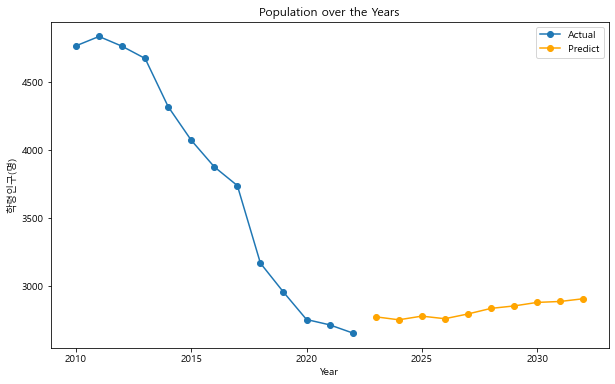

강원특별자치도 동해시


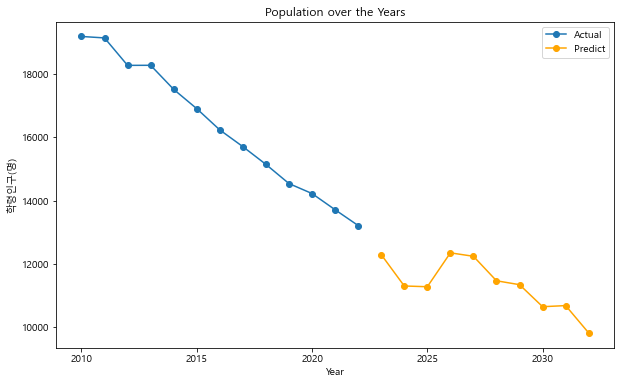

강원특별자치도 삼척시


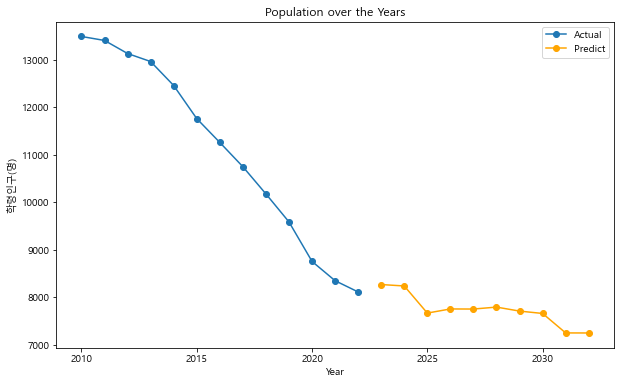

강원특별자치도 속초시


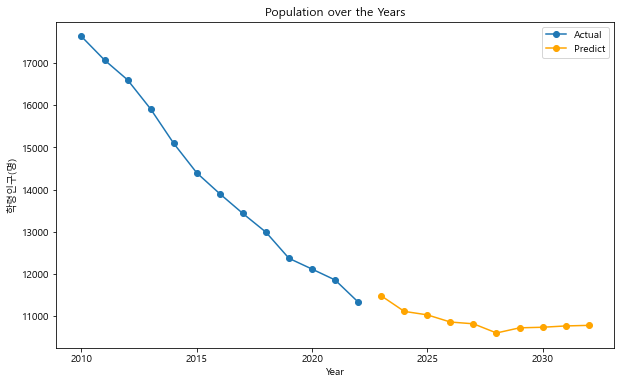

강원특별자치도 양구군


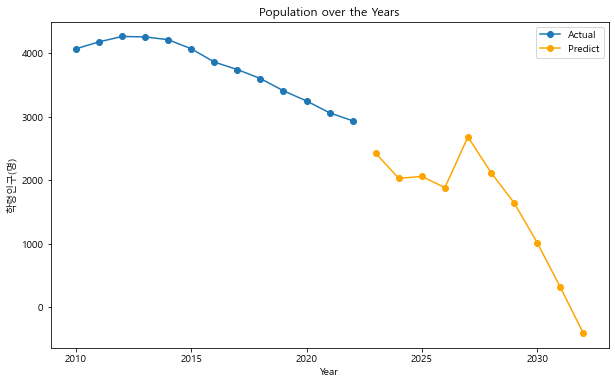

강원특별자치도 양양군


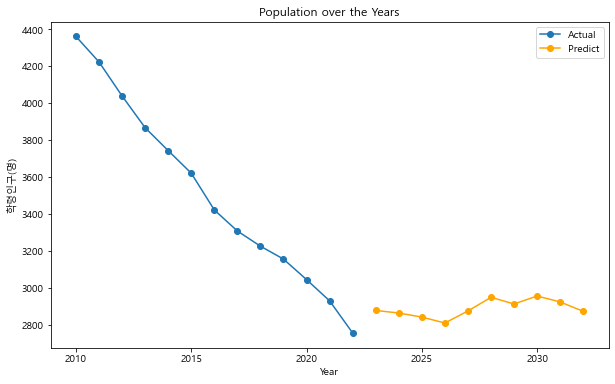

강원특별자치도 영월군


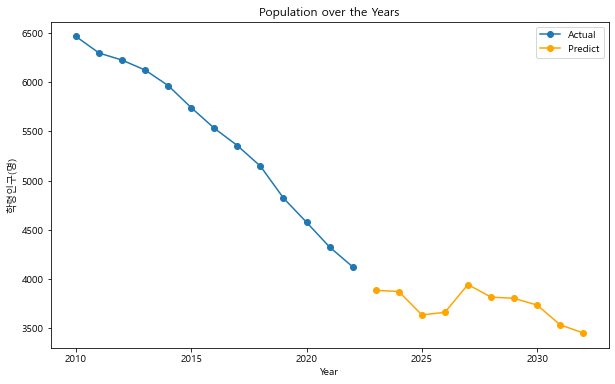

강원특별자치도 인제군


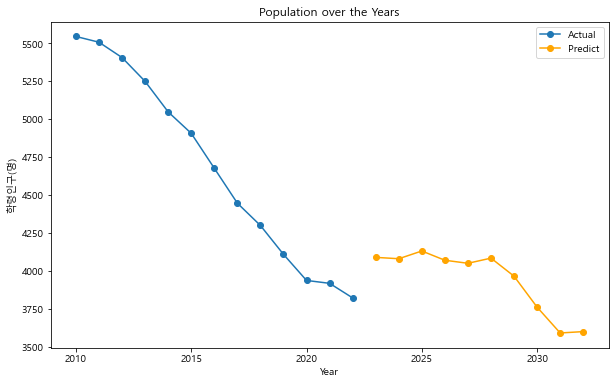

강원특별자치도 정선군


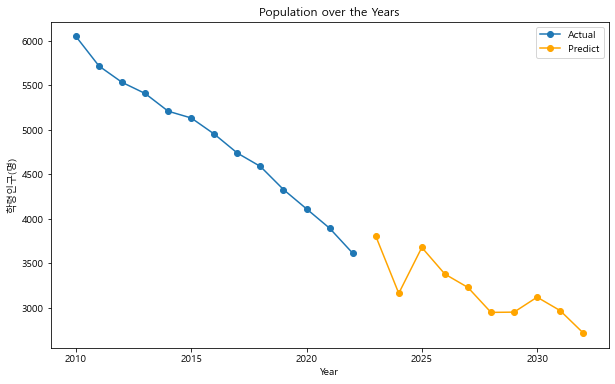

강원특별자치도 철원군


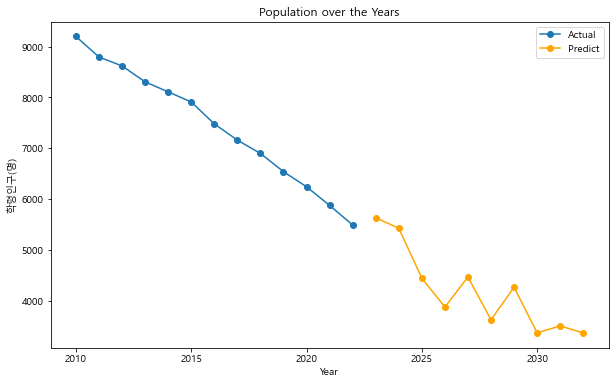

강원특별자치도 태백시


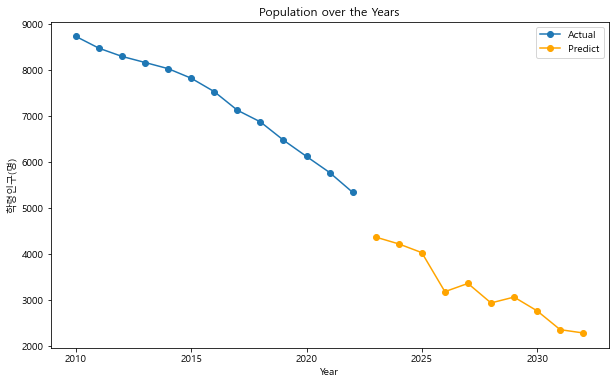

강원특별자치도 평창군


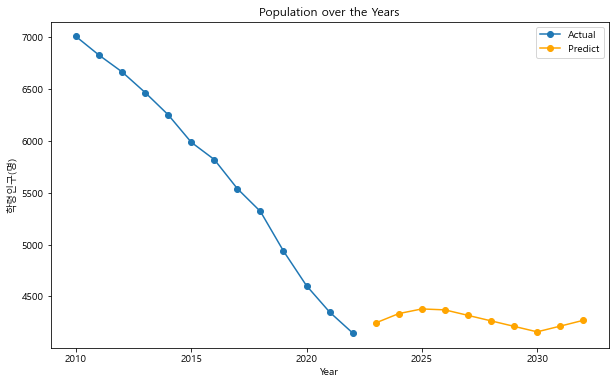

강원특별자치도 홍천군


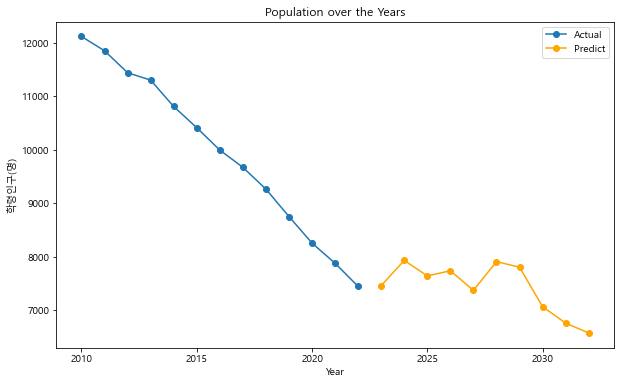

강원특별자치도 화천군


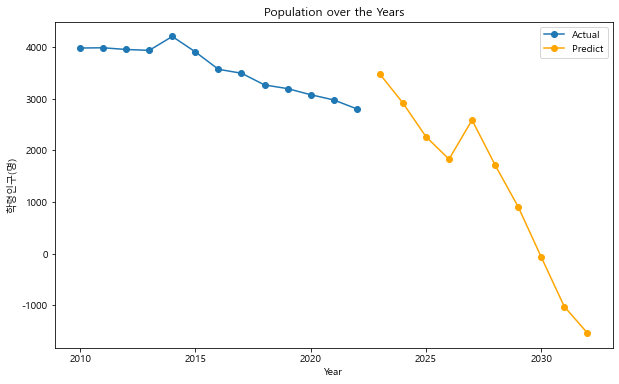

강원특별자치도 횡성군


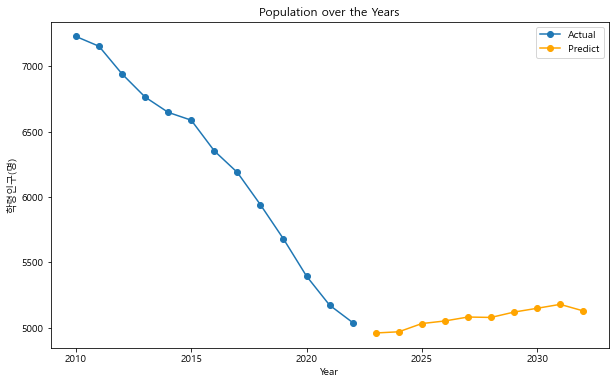

경기도 가평군


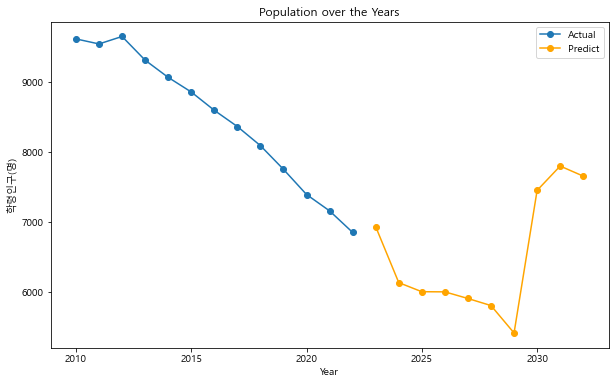

경기도 과천시


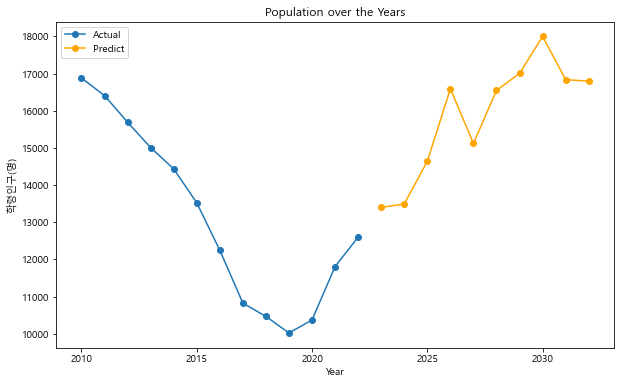

경기도 동두천시


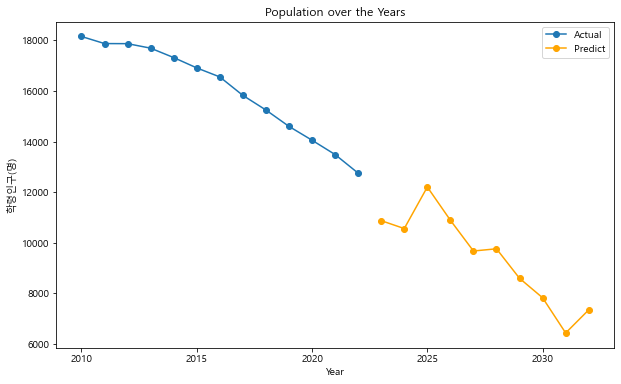

경기도 양평군


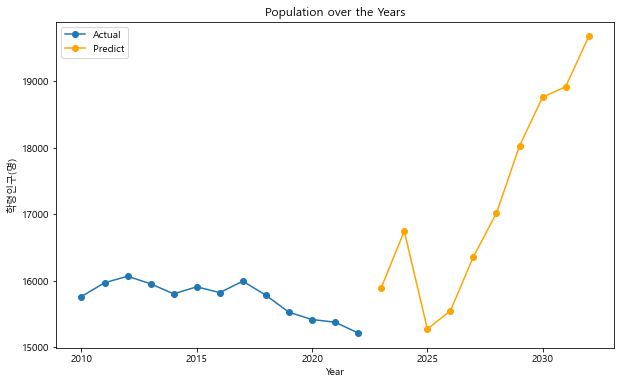

경기도 여주군
경기도 여주시
경기도 연천군


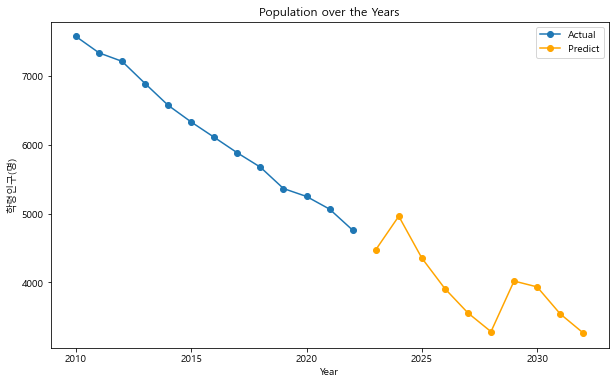

경기도 의왕시


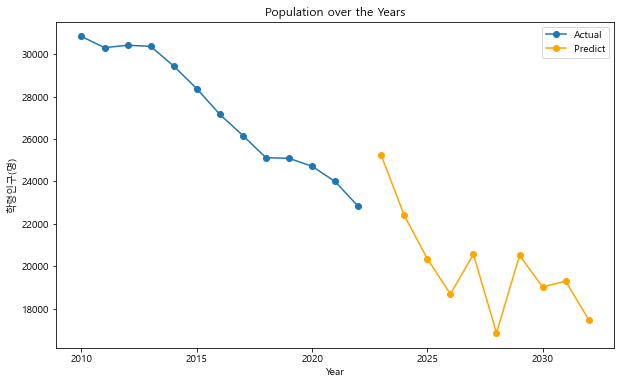

경상남도 거창군


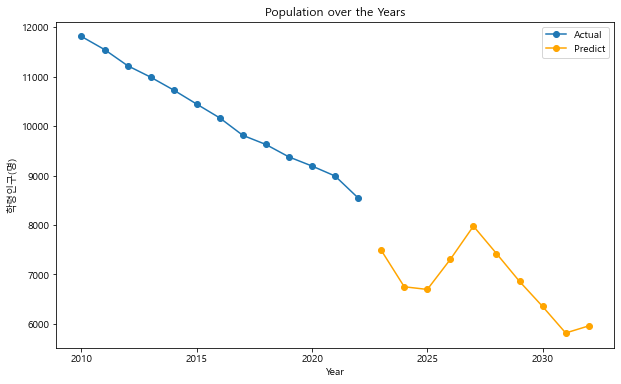

경상남도 고성군


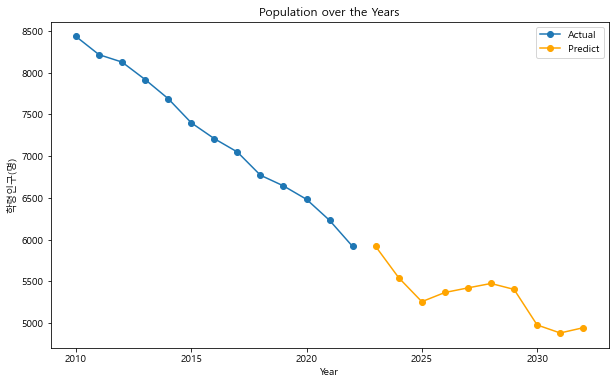

경상남도 남해군


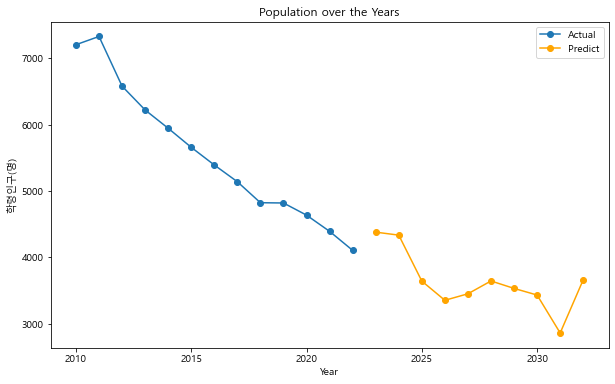

경상남도 밀양시


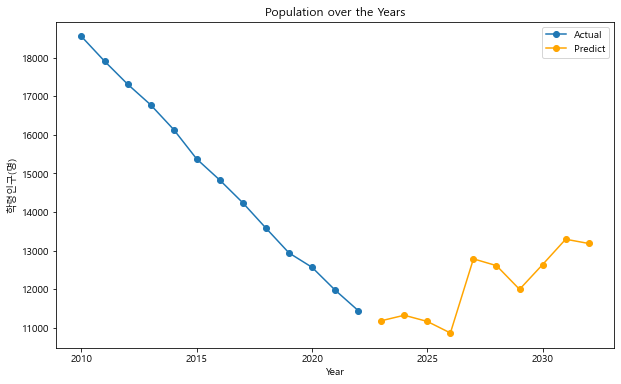

경상남도 사천시


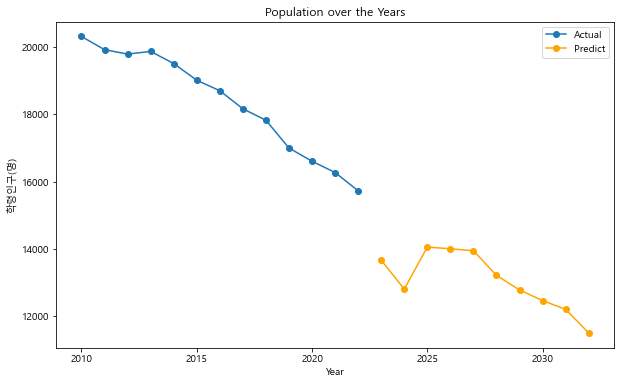

경상남도 산청군


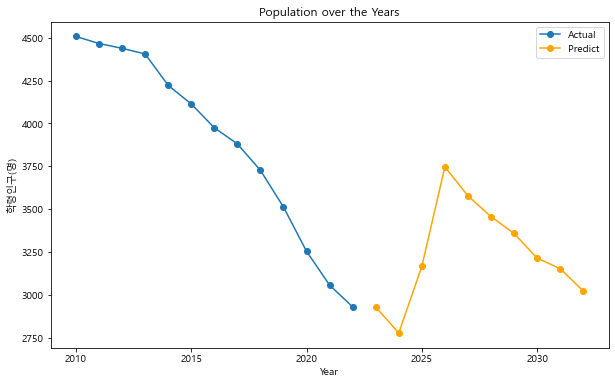

경상남도 의령군


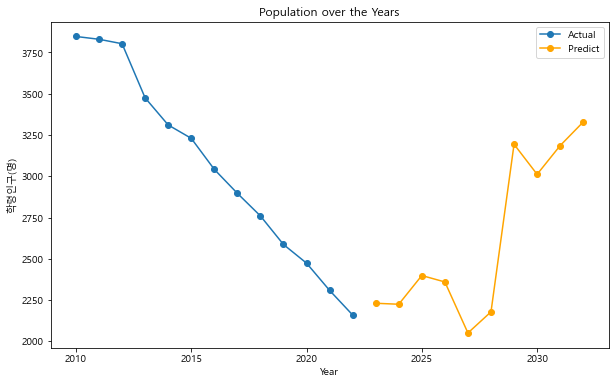

경상남도 창녕군


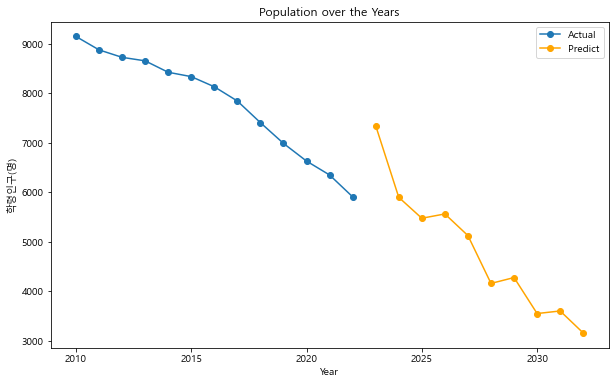

경상남도 하동군


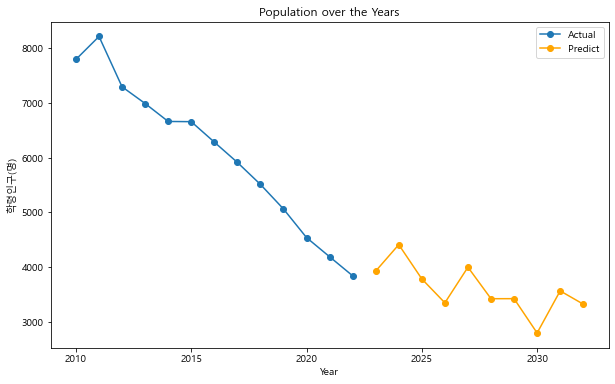

경상남도 함안군


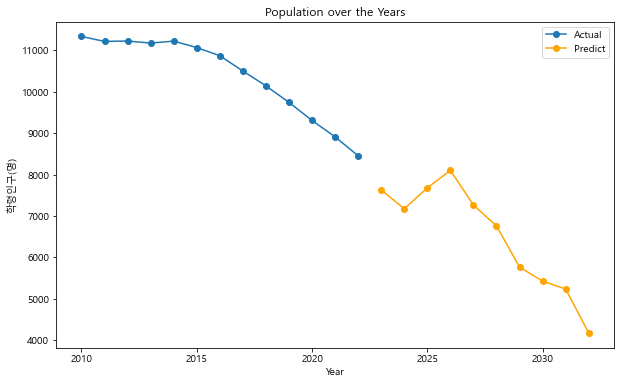

경상남도 함양군


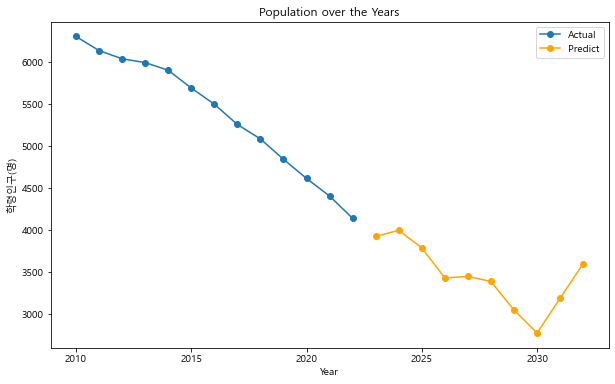

경상남도 합천군


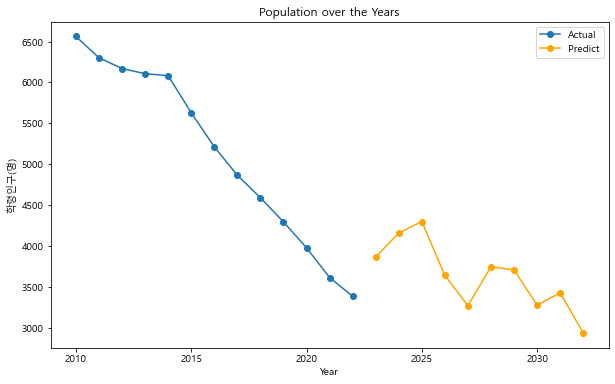

경상북도 고령군


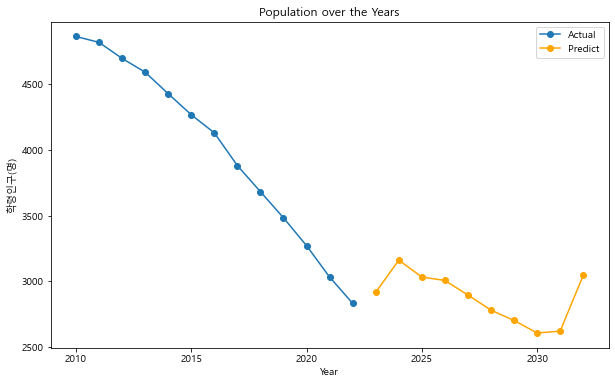

경상북도 군위군


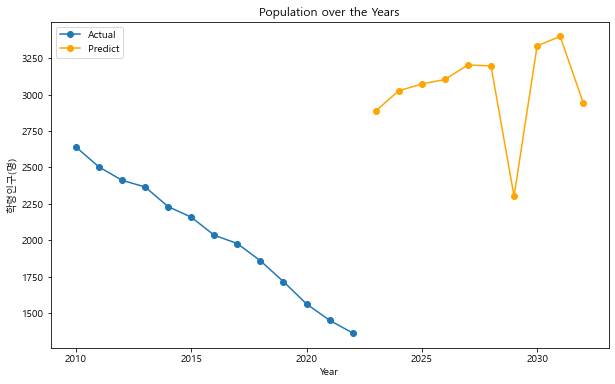

경상북도 문경시


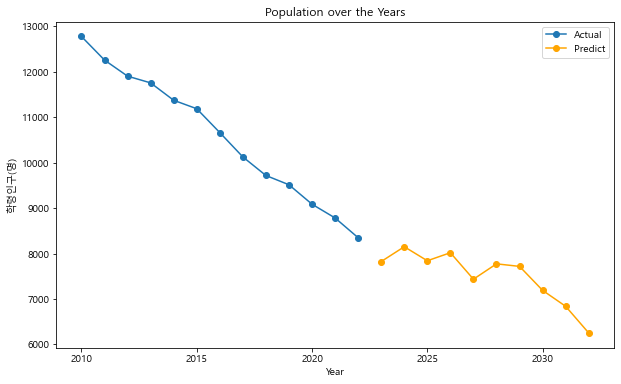

경상북도 봉화군


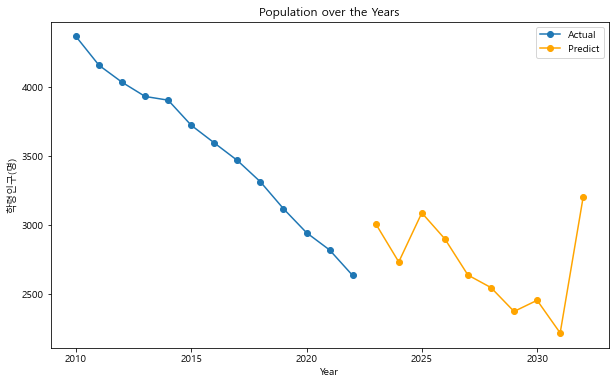

경상북도 상주시


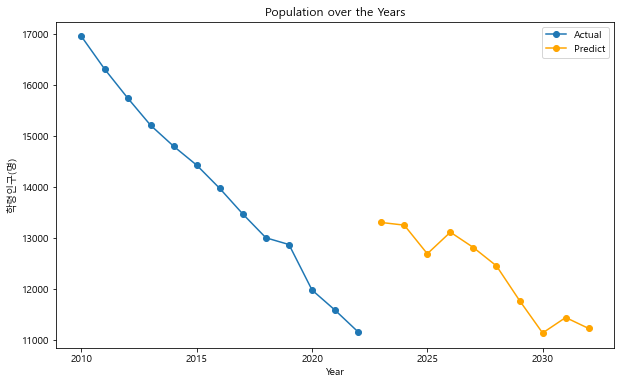

경상북도 성주군


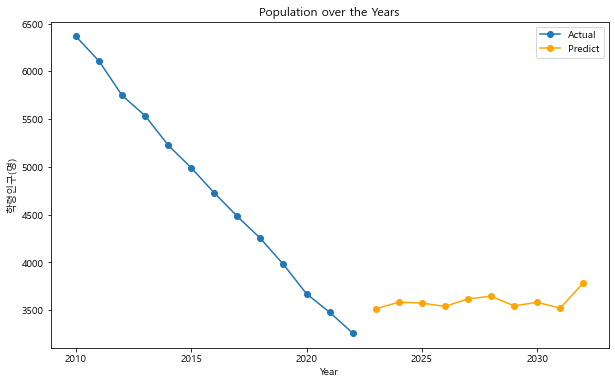

경상북도 영덕군


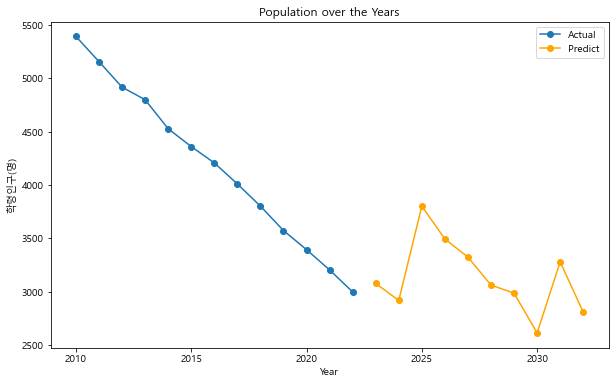

경상북도 영양군


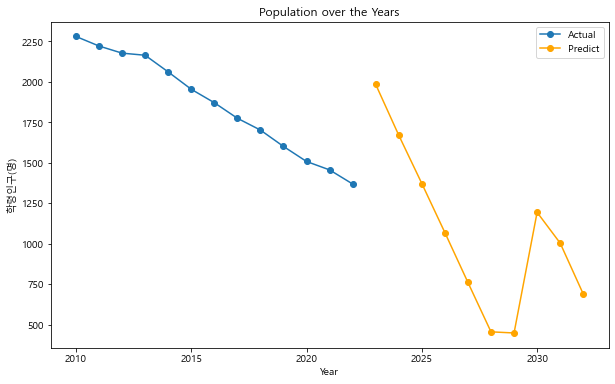

경상북도 영주시


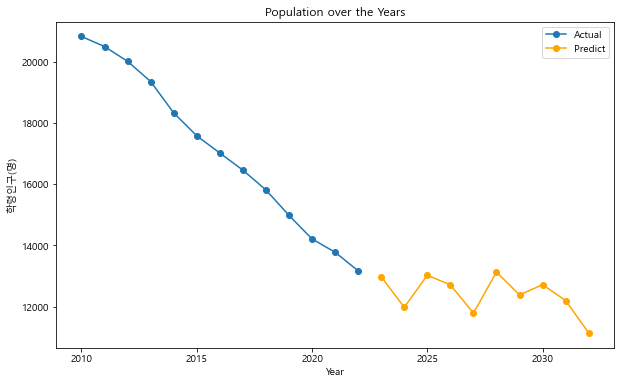

경상북도 영천시


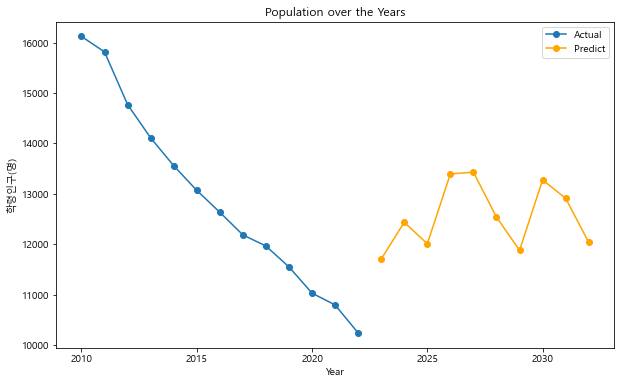

경상북도 예천군


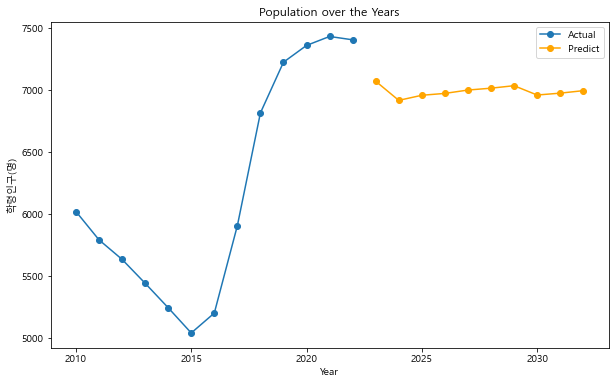

경상북도 울릉군


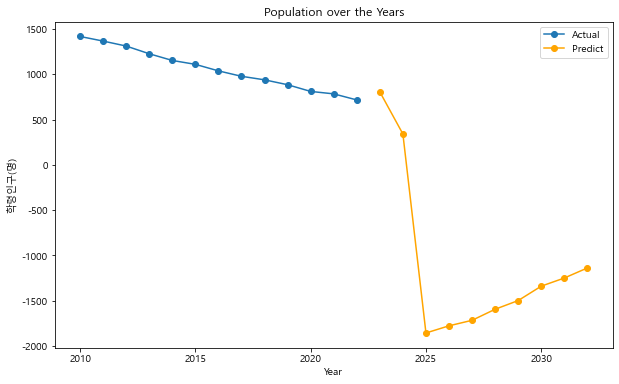

경상북도 울진군


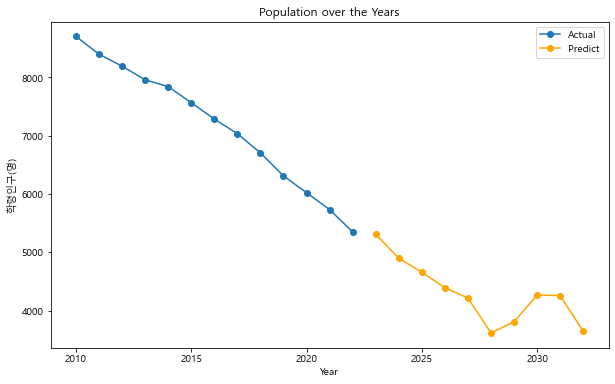

경상북도 의성군


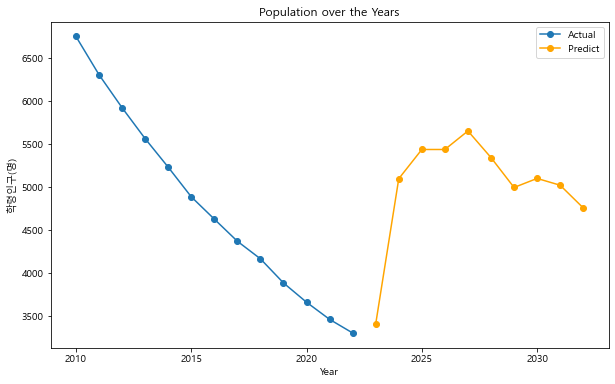

경상북도 청도군


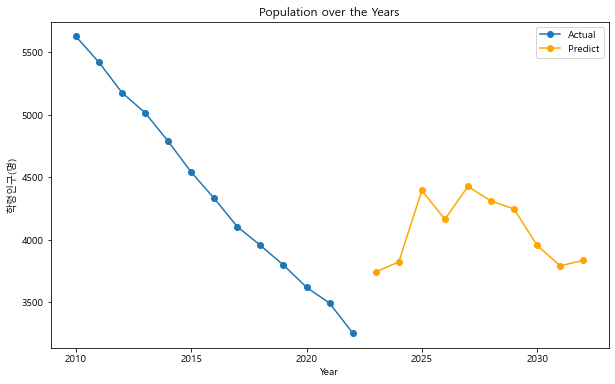

경상북도 청송군


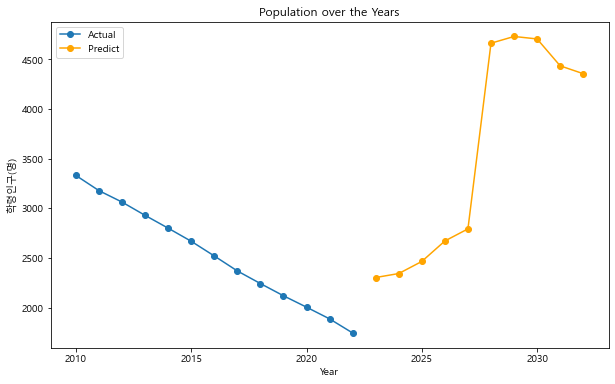

광주광역시 동구


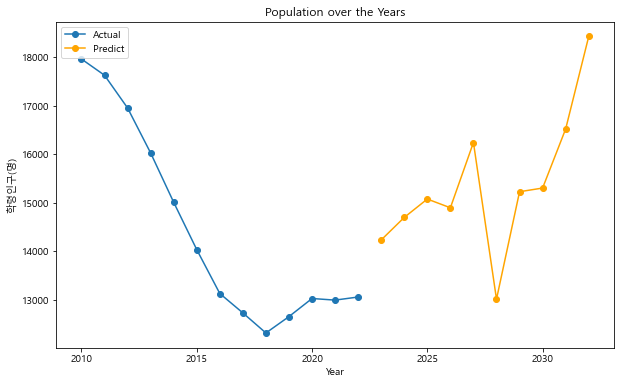

대구광역시 남구


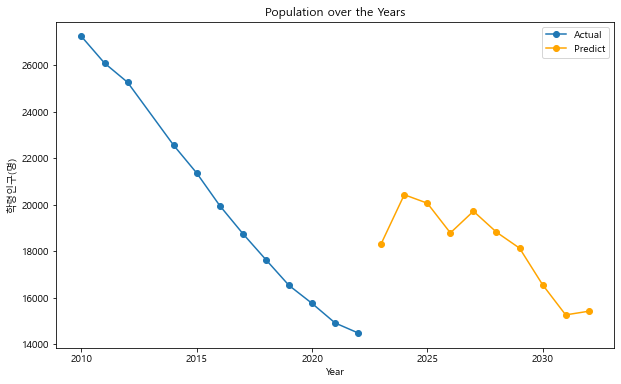

대구광역시 중구


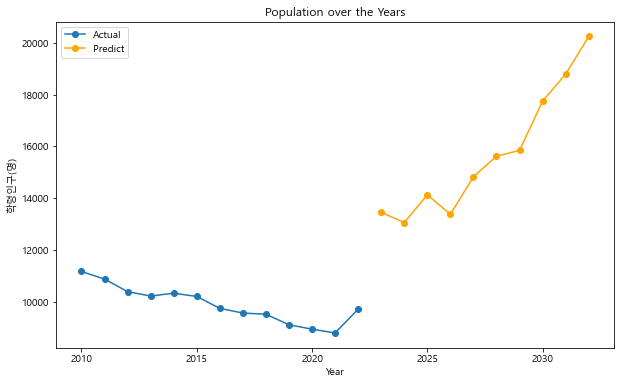

부산광역시 강서구


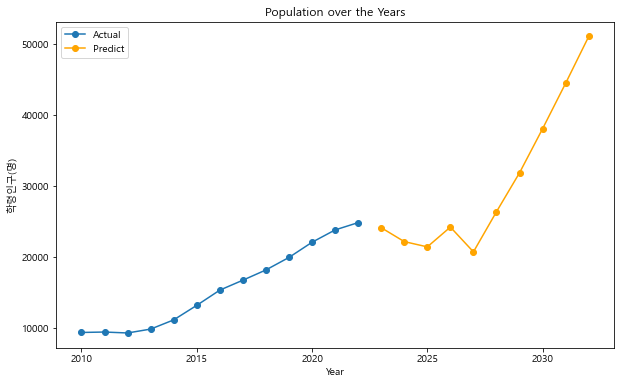

부산광역시 동구


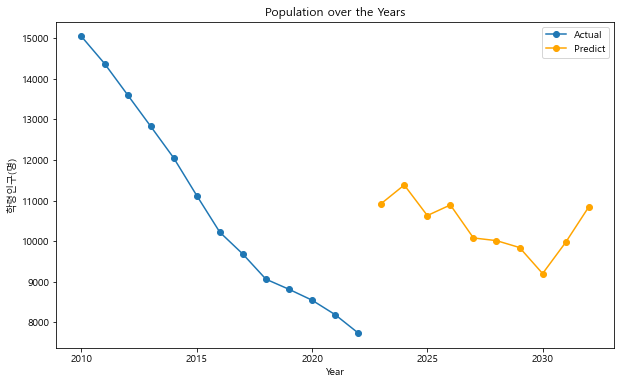

부산광역시 서구


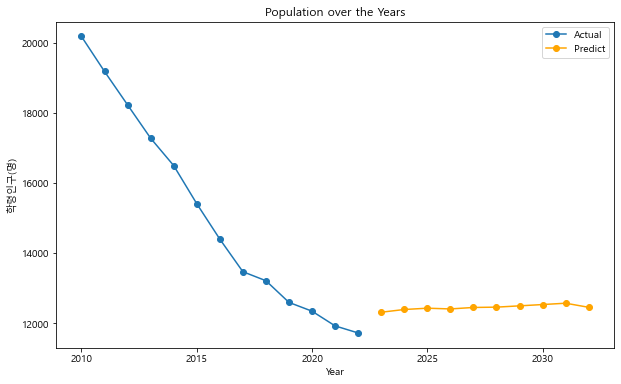

부산광역시 영도구


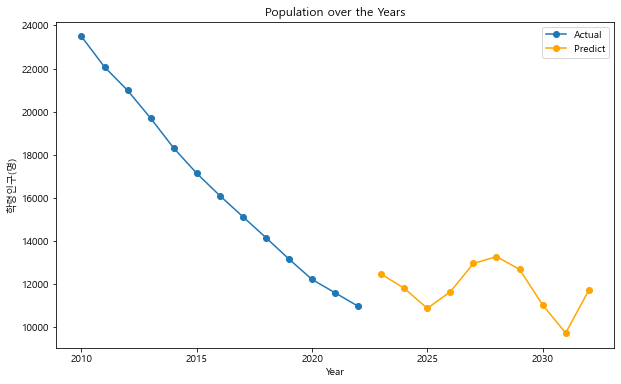

부산광역시 중구


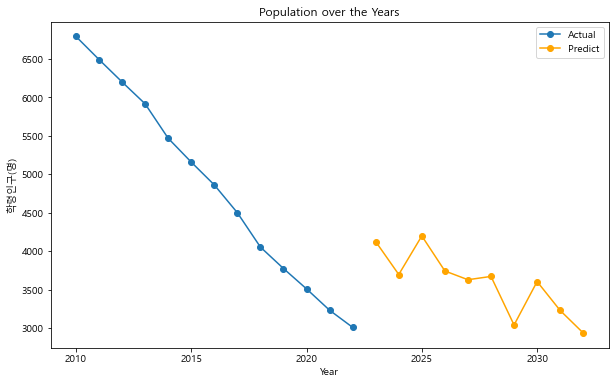

서울특별시 종로구


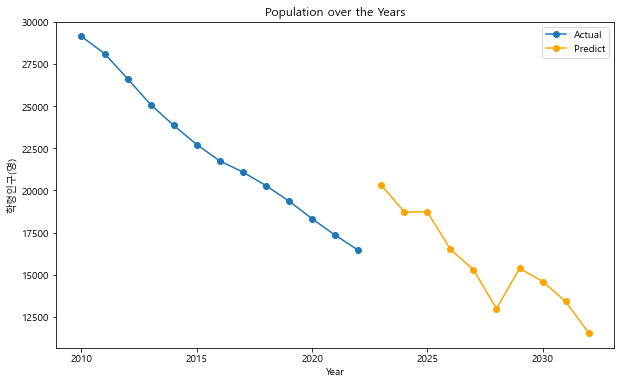

서울특별시 중구


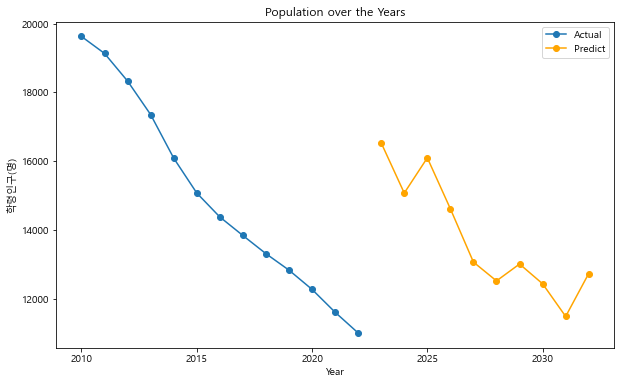

인천광역시 강화군


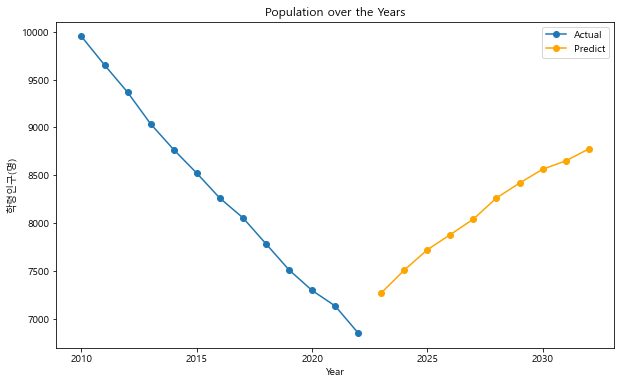

인천광역시 동구


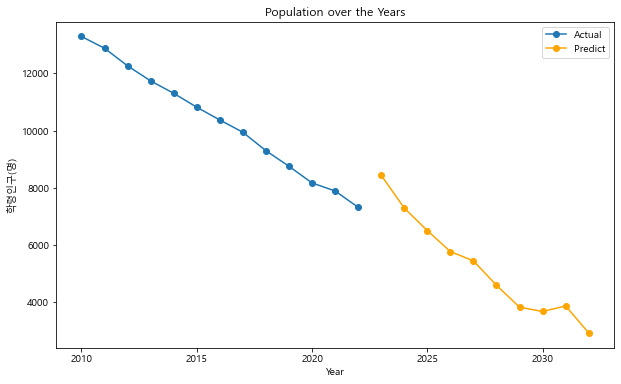

인천광역시 옹진군


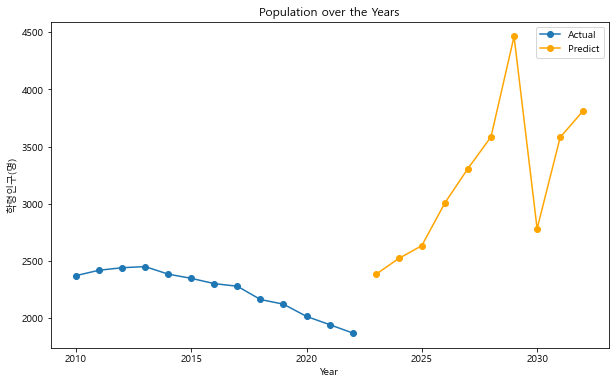

인천광역시 중구


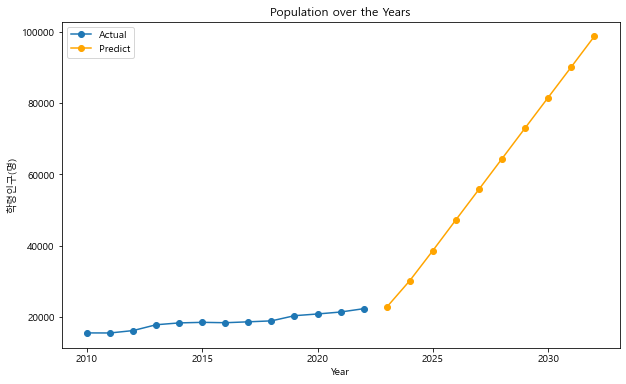

전라남도 강진군


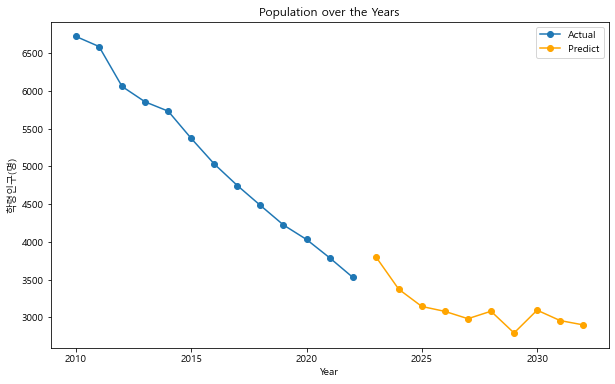

전라남도 고흥군


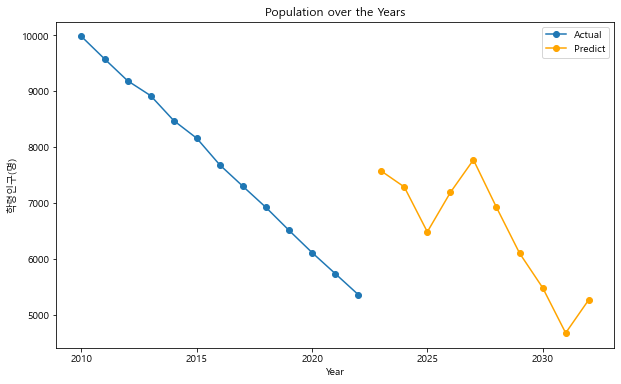

전라남도 곡성군


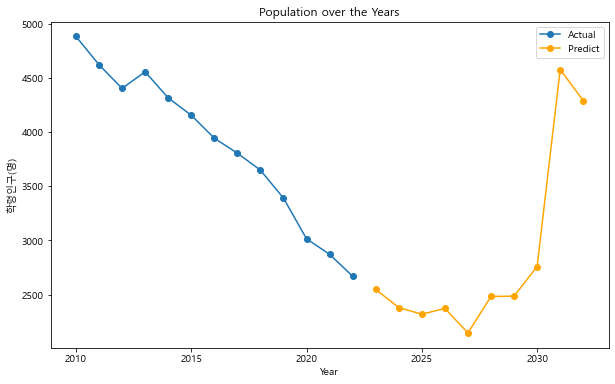

전라남도 구례군


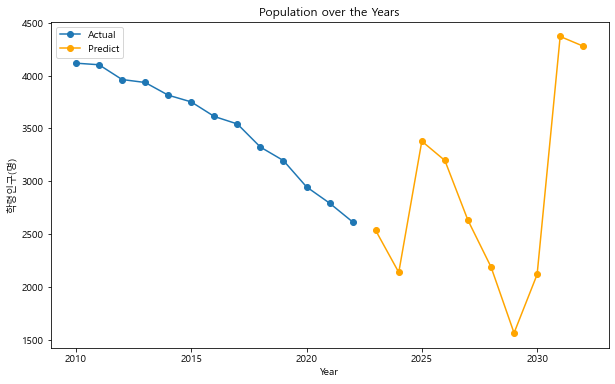

전라남도 나주시


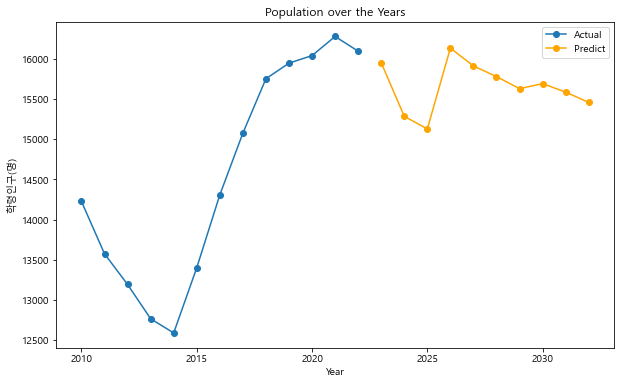

전라남도 담양군


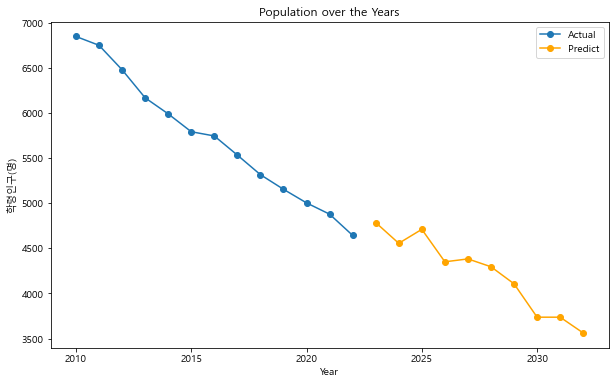

전라남도 무안군


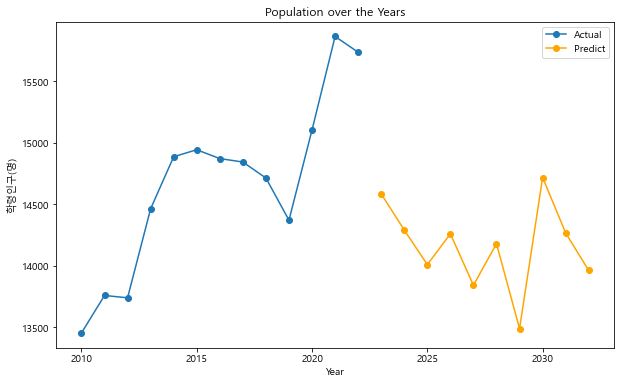

전라남도 보성군


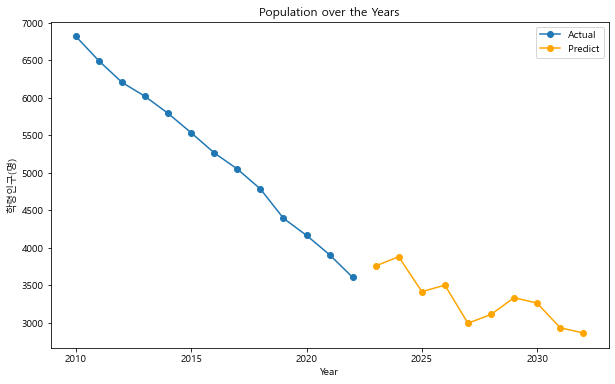

전라남도 신안군


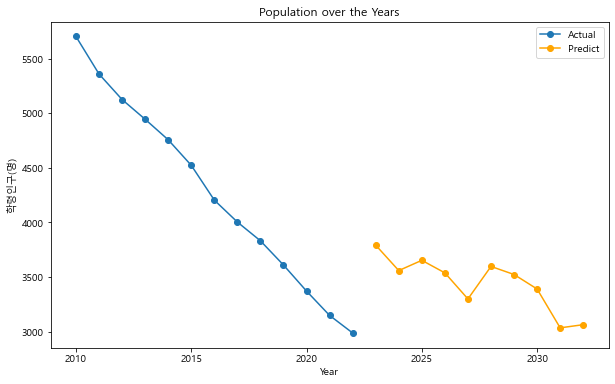

전라남도 영광군


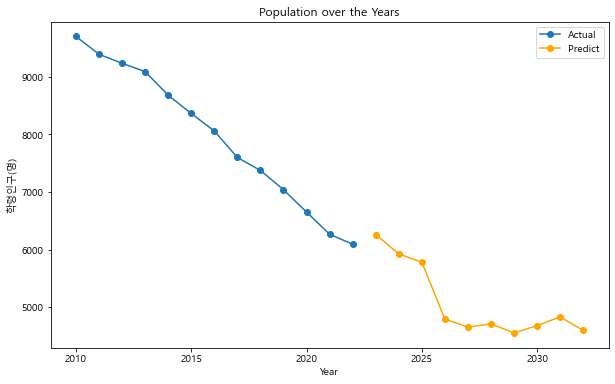

전라남도 영암군


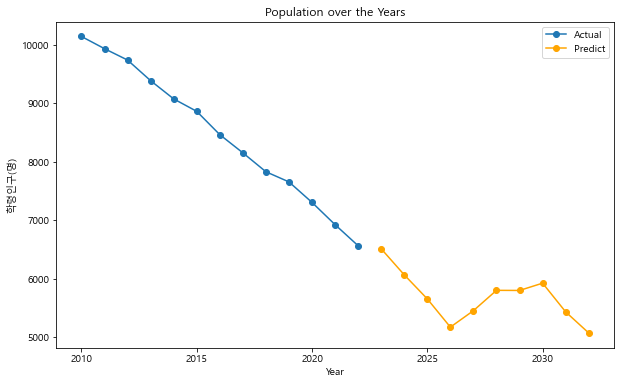

전라남도 완도군


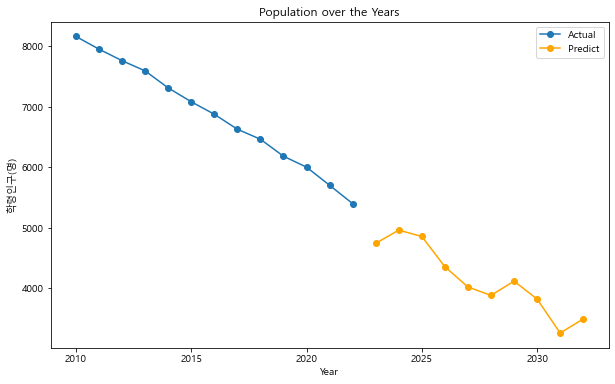

전라남도 장성군


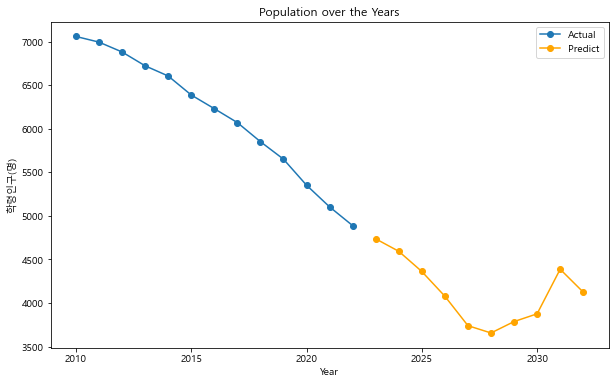

전라남도 장흥군


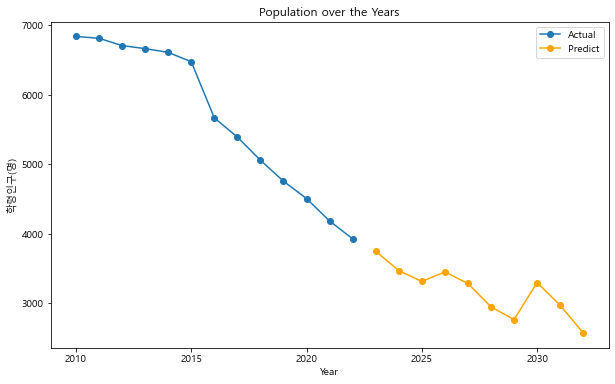

전라남도 진도군


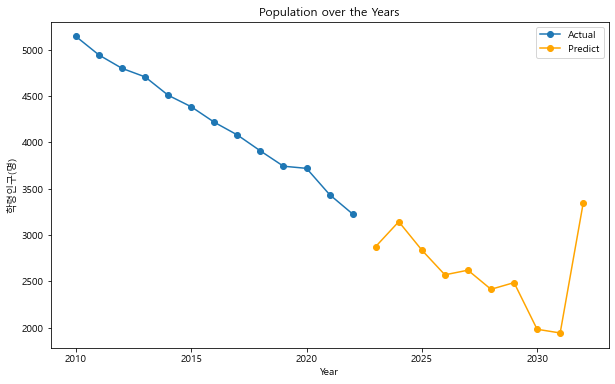

전라남도 함평군


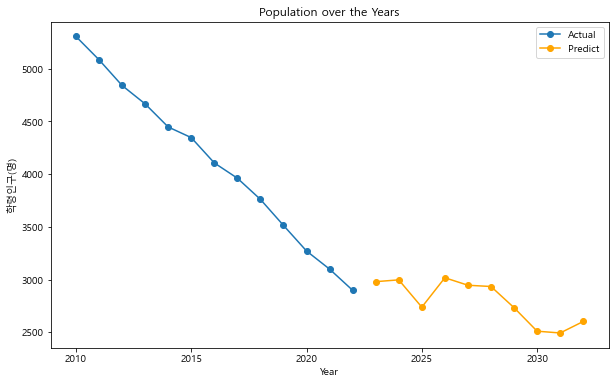

전라남도 해남군


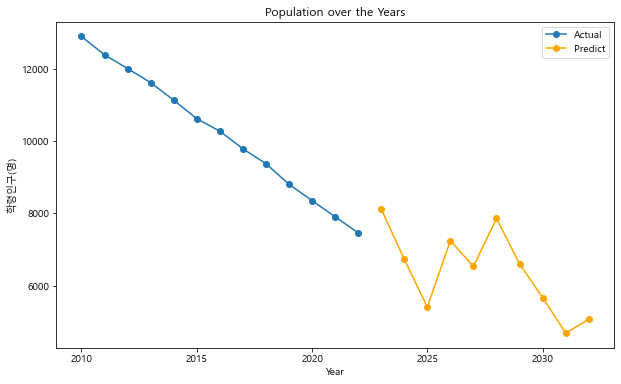

전라남도 화순군


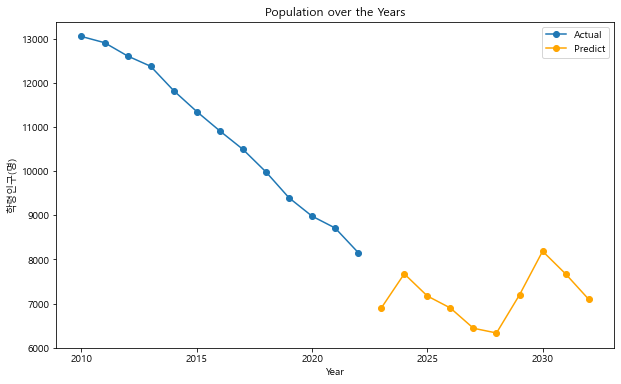

전라북도 고창군


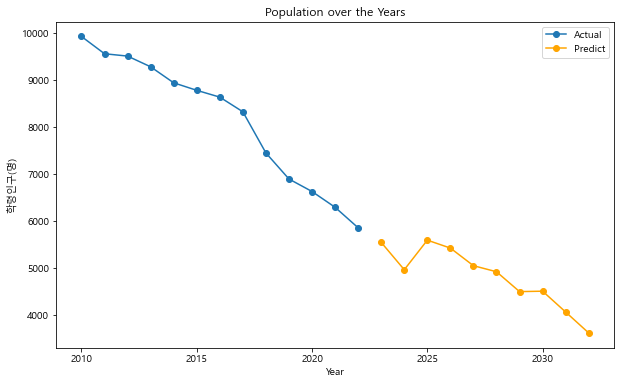

전라북도 김제시


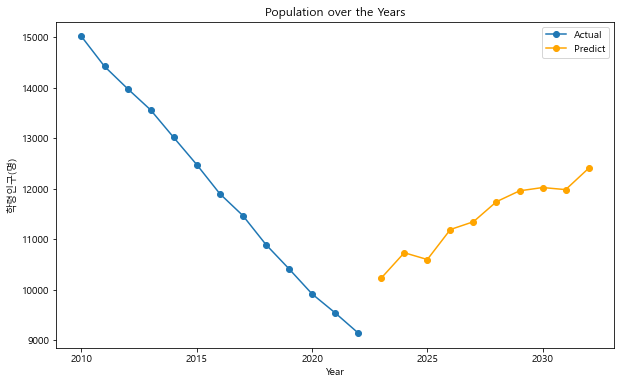

전라북도 남원시


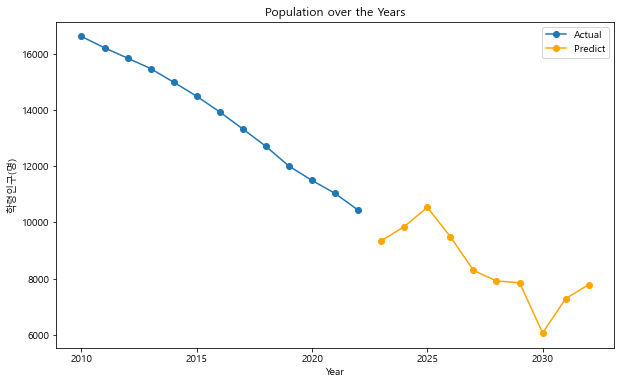

전라북도 무주군


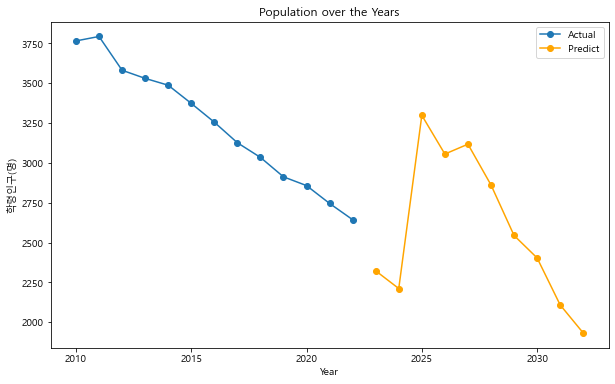

전라북도 부안군


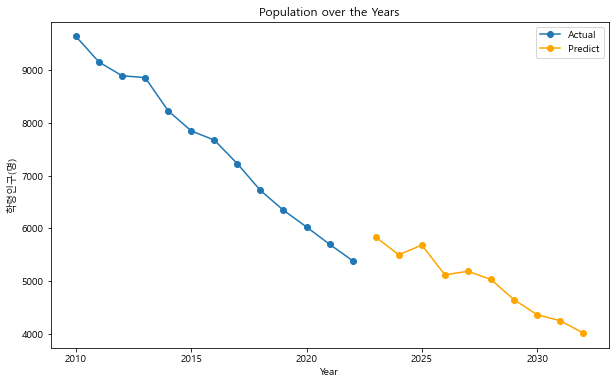

전라북도 순창군


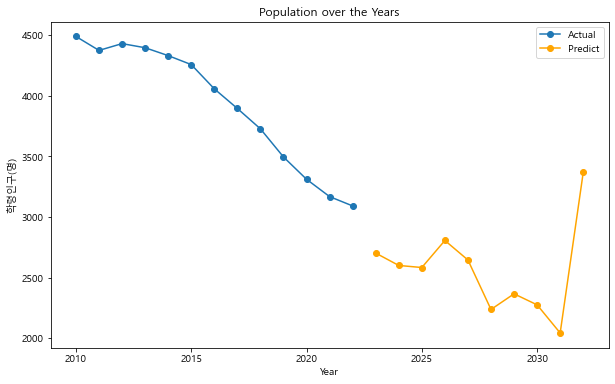

전라북도 완주군


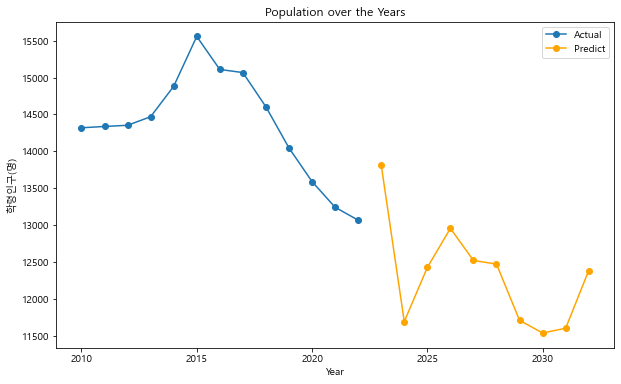

전라북도 임실군


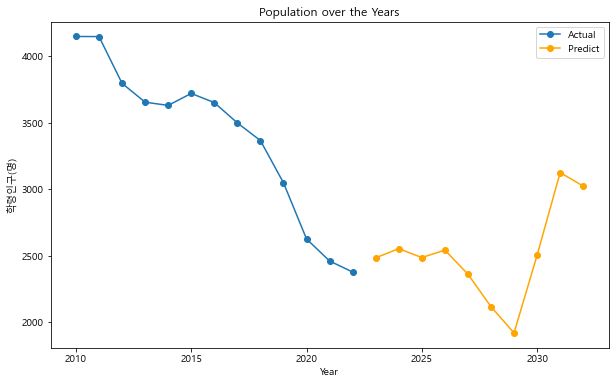

전라북도 장수군


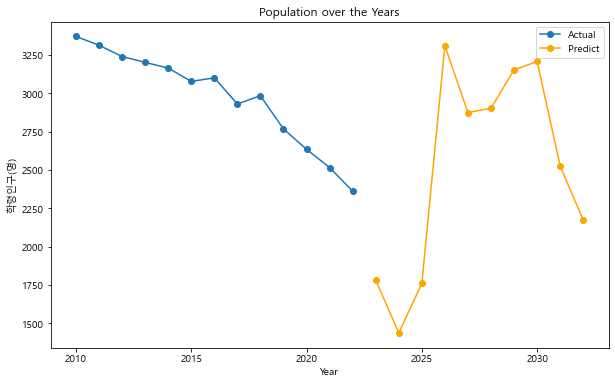

전라북도 진안군


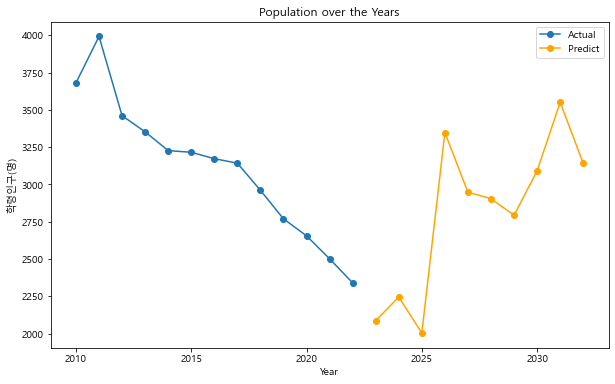

충청남도 계룡시


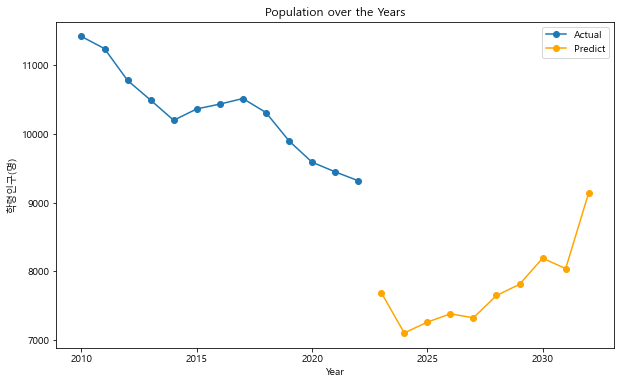

충청남도 공주시


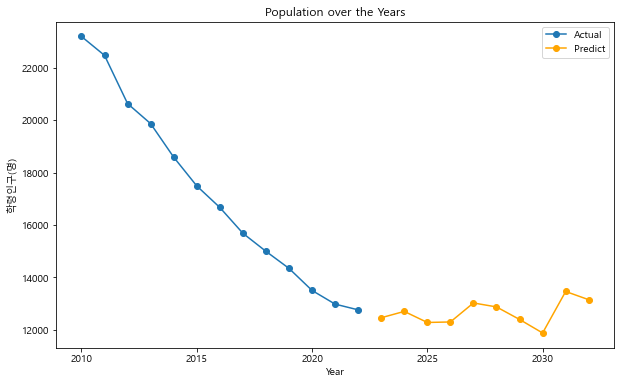

충청남도 금산군


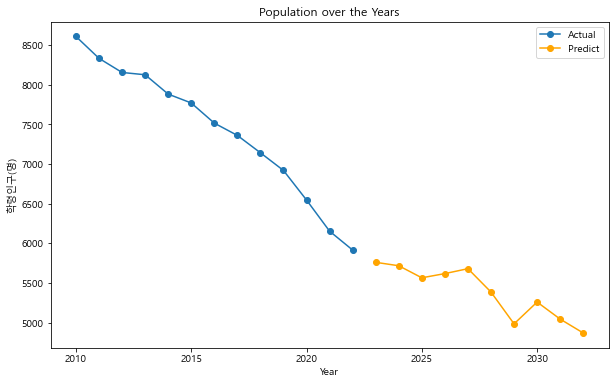

충청남도 보령시


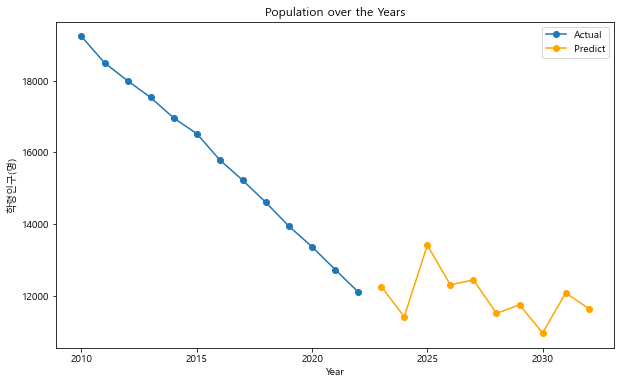

충청남도 부여군


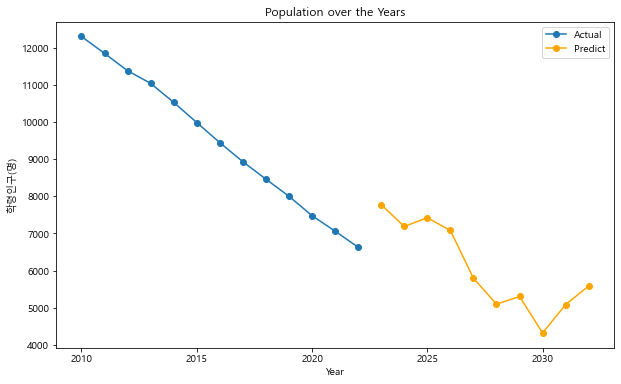

충청남도 서천군


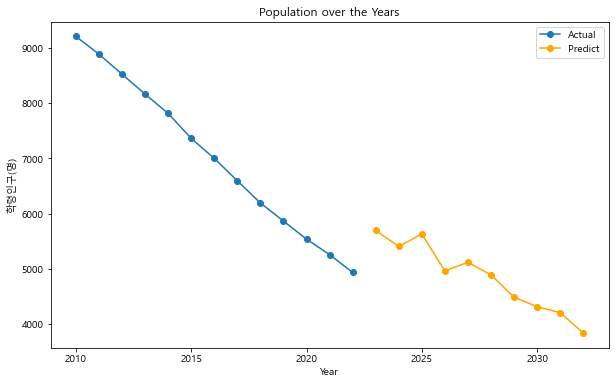

충청남도 연기군
충청남도 예산군


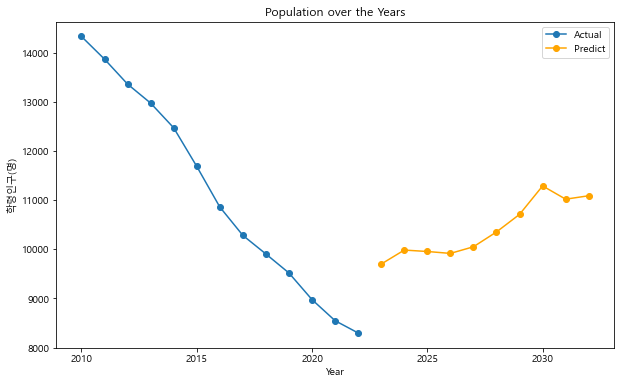

충청남도 청양군


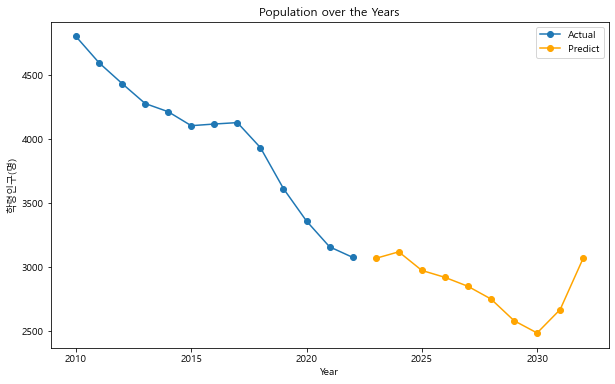

충청남도 태안군


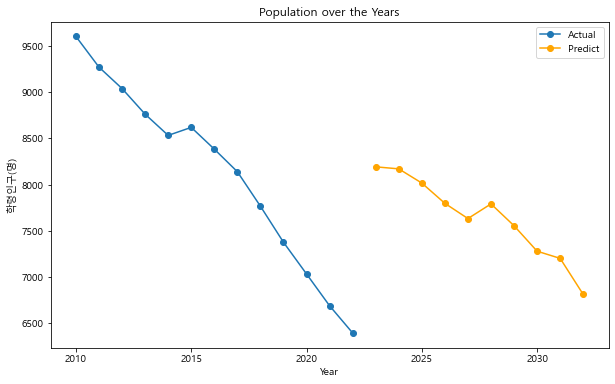

충청남도 홍성군


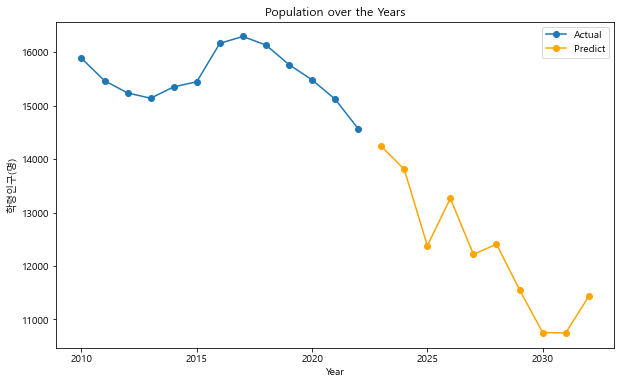

충청북도 괴산군


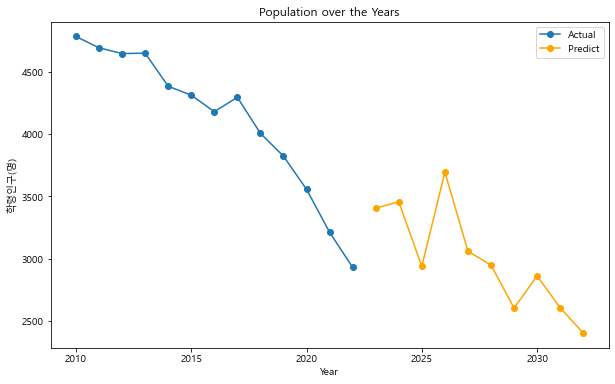

충청북도 단양군


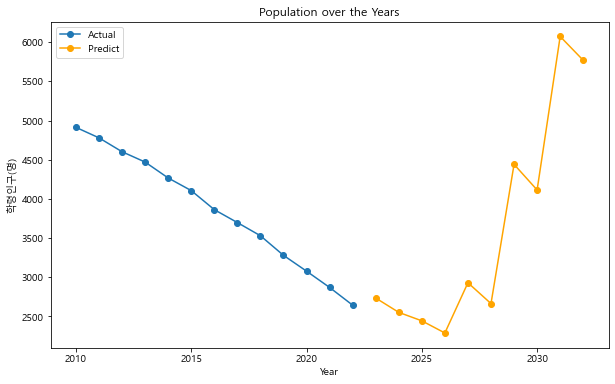

충청북도 보은군


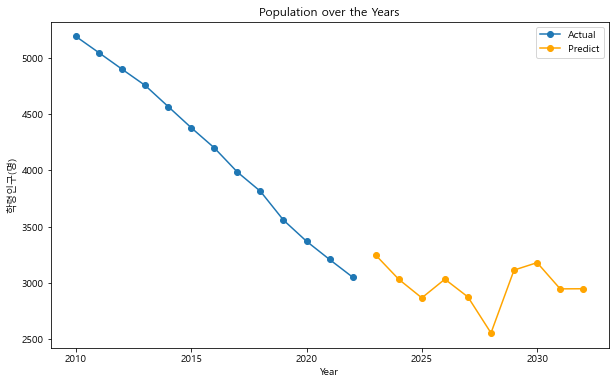

충청북도 영동군


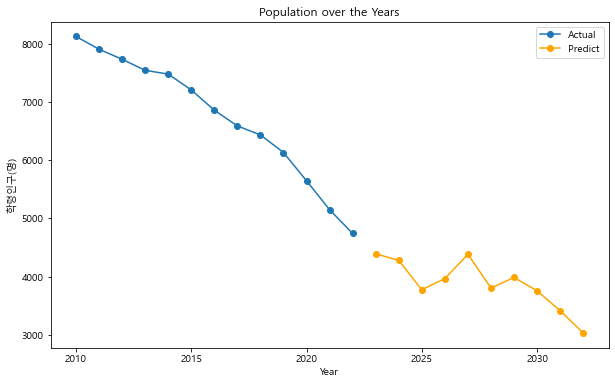

충청북도 옥천군


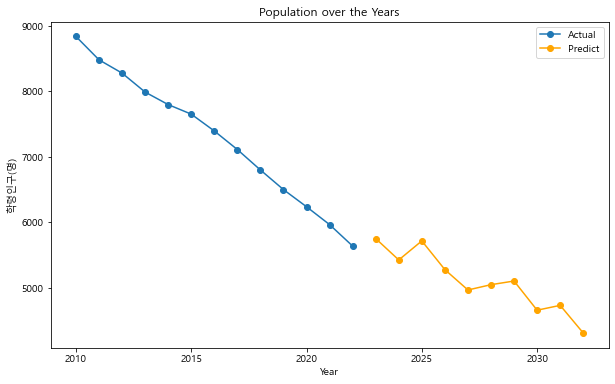

충청북도 음성군


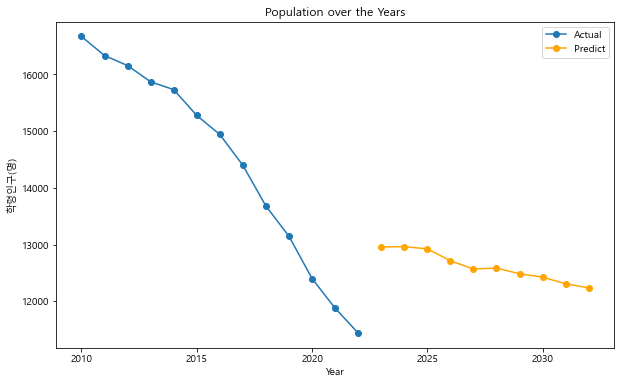

충청북도 증평군


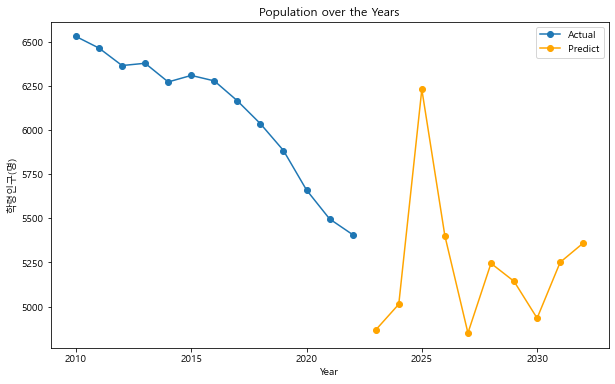

충청북도 진천군


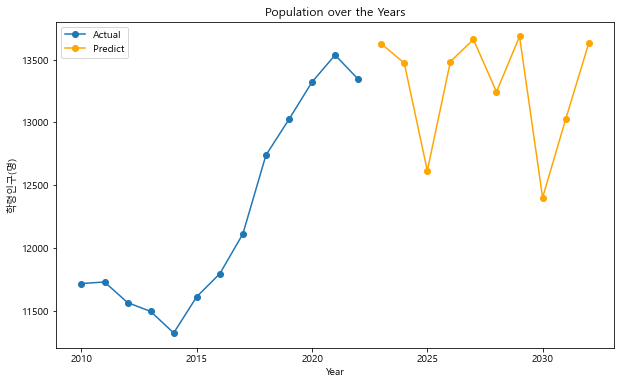

In [329]:
#print(cluster1[-1])
import matplotlib.pyplot as plt


def visualization_graph(df):
# Assuming your DataFrame is named 'df'
    df_2023_onwards = df[df['연도'] > 2022]

    plt.figure(figsize=(10, 6))
    #print(df)
    # Plotting data before 2023
    plt.plot(df['연도'][:df_2023_onwards.index[0]], df['학령인구(명)'][:df_2023_onwards.index[0]], label='Actual', marker='o')
    
    # Plotting data from 2023 onwards with a different color
    plt.plot(df_2023_onwards['연도'], df_2023_onwards['학령인구(명)'], label='Predict', marker='o', color='orange')

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('학령인구(명)')
    plt.title('Population over the Years')
    plt.legend()

    # Show the plot
    plt.show()
    
re = ['강원특별자치도 횡성군', '경기도 가평군', '경기도 과천시']
for i in range(len(cluster0)):
    print(str(cluster0[i]['행정구역'].unique()[0]))
    if(cluster0[i].shape[0] < 22):
        continue
    visualization_graph(cluster0[i])

In [328]:
result.to_csv('./predict_dataset.csv', encoding='cp949')

In [296]:
cluster2 = split_by_region(sort_cluster2)
for i in range(len(cluster2)):
    print(i+1,":",str(cluster2[i]['행정구역'].unique()[0]), end = ' ')
    if(cluster2[i].shape[0] < 10):
        print()
        continue
    predict_df = run_ARIMA(cluster2[i])
    predict_df.loc[:, predict_df.columns != '지가 변동률'] = predict_df.loc[:, predict_df.columns != '지가 변동률'].round()
    predict_df['행정구역'] = str(cluster2[i]['행정구역'].unique()[0])
    cluster2[i] = pd.concat([cluster2[i],predict_df], ignore_index=True)
    #print('Finish')
    
model2 = future_prediction(cluster_df2)#cluster_df0)

for i in range(len(cluster2)):
    colu = ['행정구역','연도','총인구수(명)','유치원 수','초등학교 수', '출생건수', '사망건수', '혼인건수','이혼건수','학령인구(명)','총인구수-학령인구(명)']
    filtered_df = cluster2[i][cluster2[i]['연도'] >= 2023]
    filtered_df = filtered_df[colu]
    # Extract each filtered row as a list, excluding specified columns
    rows_as_lists = filtered_df.apply(lambda row: row.loc[~row.index.isin(['행정구역', '연도'])].tolist(), axis=1)
    
    random_for22, arima22 = run_model2(rows_as_lists.tolist(),model1)
    if(i==0):
        print(arima22)
    #print(random_for00)
    for j in range(len(random_for22)):
        cluster2[i].loc[cluster2[i]['연도'] == 2023 + j, '학령인구(명)'] = cluster2[i].loc[cluster2[i]['연도'] == 2023 + j, '총인구수(명)'] - random_for22[j]
        cluster2[i].loc[cluster2[i]['연도']==2023+j,'총인구수-학령인구(명)'] = random_for22[j]
    # Display the result
cluster2[0]

1 : 강원특별자치도 강릉시 2 : 강원특별자치도 동해시 3 : 강원특별자치도 홍천군 4 : 경기도 구리시 5 : 경기도 동두천시 6 : 경기도 안성시 7 : 경기도 양주시 8 : 경기도 양평군 9 : 경기도 여주군 
10 : 경기도 여주시 
11 : 경기도 오산시 12 : 경기도 의왕시 13 : 경기도 이천시 14 : 경기도 포천시 15 : 경기도 하남시 16 : 경상남도 밀양시 17 : 경상남도 사천시 18 : 경상남도 통영시 19 : 경상북도 김천시 20 : 경상북도 상주시 21 : 경상북도 안동시 22 : 경상북도 영주시 23 : 경상북도 영천시 24 : 경상북도 칠곡군 25 : 광주광역시 남구 26 : 광주광역시 동구 27 : 대구광역시 남구 28 : 대구광역시 달성군 29 : 대구광역시 서구 30 : 대전광역시 대덕구 31 : 대전광역시 동구 32 : 대전광역시 중구 33 : 부산광역시 강서구 34 : 부산광역시 금정구 35 : 부산광역시 기장군 36 : 부산광역시 남구 37 : 부산광역시 동래구 38 : 부산광역시 사상구 39 : 부산광역시 서구 40 : 부산광역시 수영구 41 : 부산광역시 연제구 42 : 부산광역시 영도구 43 : 서울특별시 강북구 44 : 서울특별시 금천구 45 : 서울특별시 서대문구 46 : 서울특별시 성동구 47 : 서울특별시 용산구 48 : 서울특별시 종로구 49 : 서울특별시 중구 50 : 울산광역시 동구 51 : 울산광역시 북구 52 : 울산광역시 울주군 53 : 울산광역시 중구 54 : 인천광역시 중구 55 : 전라남도 광양시 56 : 전라남도 나주시 57 : 전라남도 무안군 58 : 전라남도 해남군 59 : 전라북도 김제시 60 : 전라북도 남원시 61 : 전라북도 완주군 62 : 전라북도 정읍시 63 : 제주특별자치도 서귀포시 64 : 충청남도 공주시 65 : 충청남도 논산시 66 : 충청남도 당진군 
67 : 충청남도 당진시 68 : 충청남도 보령시 69 : 충청남도 서산시 70 : 충청남도 연기군 
71 : 

KeyboardInterrupt: 

In [114]:
cluster2[1]

,행정구역,연도,총인구수(명),총인구수-학령인구(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명)
0,강원특별자치도 동해시,2010.0,95236.0,76052.0,23.0,14.0,767.0,661.0,527.0,233.0,19184.0
1,강원특별자치도 동해시,2011.0,95804.0,76666.0,22.0,14.0,792.0,595.0,522.0,202.0,19138.0
2,강원특별자치도 동해시,2012.0,93897.0,75626.0,22.0,14.0,769.0,655.0,500.0,203.0,18271.0
3,강원특별자치도 동해시,2013.0,95143.0,76870.0,22.0,14.0,727.0,665.0,479.0,257.0,18273.0
4,강원특별자치도 동해시,2014.0,94562.0,77050.0,22.0,14.0,703.0,600.0,481.0,244.0,17512.0
5,강원특별자치도 동해시,2015.0,93895.0,76992.0,22.0,14.0,667.0,681.0,475.0,201.0,16903.0
6,강원특별자치도 동해시,2016.0,93297.0,77066.0,18.0,14.0,662.0,640.0,447.0,194.0,16231.0
7,강원특별자치도 동해시,2017.0,92851.0,77148.0,17.0,14.0,561.0,625.0,419.0,218.0,15703.0
8,강원특별자치도 동해시,2018.0,91272.0,76130.0,17.0,14.0,472.0,731.0,375.0,190.0,15142.0
9,강원특별자치도 동해시,2019.0,90522.0,75986.0,17.0,14.0,422.0,624.0,382.0,254.0,14536.0
